In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Scalers
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

##import xgboost as xgb
##from xgboost import XGBClassifier

# Hyperparameter tuning
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# RFE
from sklearn.feature_selection import RFE

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Set pandas options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.mode.chained_assignment = None

import os
import warnings
warnings.filterwarnings('ignore')

# Reading and Understanding the Data:

In [2]:
# Read data

churn_df = pd.read_csv("telecom_churn_data.csv")
churn_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  \
0     7000842753        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  197.385  214.816  213.803   21.100          NaN          NaN         0.00          NaN           NaN           NaN          0.00           NaN            NaN            NaN           0.00            NaN            NaN            NaN           0.00            NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN           NaN           NaN          0.00           NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN   
1     7001865778        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014   34.047  355.074  268.321   86.285        24.11        78.68         7.68        18.34         15.74         99.84        304.76         53.76            0.0           0.00           0.00           0.00            0.0           0.00           0.00           0.00             23.88             74.56              7.68             18.34             11.51             75.94            291.86             53.76              0.00              0.00              0.00              0.00               0.0              2.91              0.00              0.00         35.39        150.51        299.54         72.11              0.23              4.11              0.00              0.00              0.00              0.46              0.13              0.00              0.00              0.00              0.00               0.0   
2     7001625959        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  167.690  189.058  210.226  290.714        11.54        55.24        37.26        74.81        143.33        220.59        208.36        118.91            0.0           0.00           0.00          38.49            0.0           0.00           0.00          70.94              7.19             28.74             13.58             14.39             29.34             16.86             38.46             28.16             24.11             21.79             15.61             22.24               0.0            135.54             45.76              0.48         60.66         67.41         67.66         64.81              4.34             26.49             22.58              8.76             41.81             67.41             75.53              9.28              1.48             14.76             22.83               0.0   
3     7001204172        109             0.0            

# Data Analysis and Preparation

In [3]:
churn_df.tail()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  \
99994     7001548952        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014   18.471   69.161   57.530   29.950         5.40         3.36         5.91         0.00         15.19         54.46         52.79         27.14            0.0            0.0            0.0           0.00            0.0            0.0            0.0           0.00              5.40              3.36              5.91              0.00             12.78             54.46             49.58             24.78              0.00              0.00              0.00              2.25              0.00               0.0              3.21              0.11         18.18         57.83         55.49         27.03              0.00               0.0               0.0               0.0              0.00              0.00               0.0               0.0              0.00              0.00               0.0               0.0   
99995     7000607688        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  112.201   77.811   79.081  140.835        29.26        18.13        16.06        49.49        100.83         69.01         66.39         56.13            0.0            0.0            0.0           0.95            0.0            0.0            0.0           4.23             28.93             18.13             16.06             49.49             91.34             47.53             57.51             46.71              1.71              9.81              5.83              3.28              0.00               0.0              0.00              0.00        121.99         75.48         79.41         99.49              0.33               0.0               0.0               0.0              4.83              6.84               0.0               1.9              2.93              4.81               0.0               0.0   
99996     7000087541        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  229.187    0.000    0.000    0.000         1.11          NaN          NaN          NaN         21.04           NaN           NaN           NaN            0.0            NaN            NaN            NaN            0.0            NaN            NaN            NaN              1.11               NaN               NaN               NaN             13.33               NaN               NaN               NaN              0.00               NaN               NaN               NaN              4.71               NaN               NaN               NaN         14.44           NaN           NaN           NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN   
99997     7000498689        109            

In [4]:
churn_df.shape

(99999, 226)

In [5]:
churn_df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  \
count   9.999900e+04    99999.0         98981.0         98981.0         98981.0  99999.000000  99999.000000  99999.000000  99999.000000  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   94621.000000   92254.000000   96062.000000   96140.000000   94621.000000   92254.000000      96062.000000      96140.000000      94621.000000      92254.000000      96062.000000      96140.000000      94621.000000      92254.000000      96062.000000      96140.000000      94621.000000      92254.000000      96062.000000      96140.000000      94621.000000      92254.000000  96062.000000  96140.000000  94621.000000  92254.000000      96062.000000      96140.000000      94621.000000      92254.000000      96062.000000      96140.000000      94621.000000      92254.000000      96062.000000      96140.000000      94621.000000      92254.000000           96062.0           96140.0           94621.0   
mean    7.001207e+09      109.0             0.0             0.0             0.0    282.987358    278.536648    279.154731    261.645069    132.395875    133.670805    133.018098    130.302327    197.935577    197.045133    196.574803    190.337222       9.950013       7.149898       7.292981       6.343841      13.911337       9.818732       9.971890       8.555519         47.100763         46.473010         45.887806         44.584446         93.342088         91.397131         91.755128         90.463192          3.751013          3.792985          3.677991          3.655123          1.123056          1.368500          1.433821          1.232726    144.201175    141.670476    141.328209    138.709970         79.829870         83.299598         83.282673         82.342919         87.299624         90.804137         89.838390         86.276622          1.129011          1.115010          1.067792          1.042362               0.0               0.0               0.0   
std     6.956694e+05        0.0             0.0             0.0             0.0    328.439770    338.156291    344.474791    341.998630    297.207406    308.794148    308.951589    308.477668    316.851613    325.862803    327.170662    319.396092      72.825411      73.447948      68.402466      57.137537      71.443196      58.455762      64.713221      58.438186        150.856393        155.318705        151.184830        147.995390        162.780544        157.492308        156.537048        158.681454         14.230438         14.264986         13.270996         13.457549          5.448946          7.533445          6.783335          5.619021    251.751489    248.731086    245.914311    245.934517        252.476533        263.631042        265.486090        267.184991        255.617850        269.347911        271.757783        261.407396          7.984970          8.599406          7.905971          8.261770               0.0               0.0               0.0   
min     7.000000e+09      109.0             0.0             0.0    

# Lets Filter High Value Customers and Derive Churn
### Advantages of Filtering and Deriving Churn before Data Analysis

In [6]:
# custom function to display a basic summary of the dataset:

def data_summary(dataset):
    output = []
    for col in dataset.columns:
        unique   = dataset[col].nunique()                        
        null_val = np.sum(pd.isna(dataset[col]))                 
        nonNull  = len(dataset) - null_val                        
        colType  = str(dataset[col].dtype)                       
        output.append([col, unique, null_val, nonNull, colType]) 
    output = pd.DataFrame(output)                                
    output.columns = ["col_name","n_unique","null_values","non_null_values","dtype"] 
    return output

In [7]:
# summary of the data-set using custom function defined:

data_summary(churn_df).sort_values("null_values", ascending = False)

col_name  n_unique  null_values  non_null_values    dtype
189                 arpu_3g_6      7418        74846            25153  float64
197          night_pck_user_6         2        74846            25153  float64
161         total_rech_data_6        37        74846            25153  float64
193                 arpu_2g_6      6990        74846            25153  float64
165           max_rech_data_6        48        74846            25153  float64
217                 fb_user_6         2        74846            25153  float64
177        av_rech_amt_data_6       887        74846            25153  float64
157  date_of_last_rech_data_6        30        74846            25153   object
169           count_rech_2g_6        31        74846            25153  float64
173           count_rech_3g_6        25        74846            25153  float64
158  date_of_last_rech_data_7        31        74428            25571   object
162         total_rech_data_7        42        74428            25571  float64
218                 fb_user_7         2        74428            25571  float64
166           max_rech_data_7        48        74428            25571  float64
198          night_pck_user_7         2        74428            25571  float64
170           count_rech_2g_7        36        74428            25571  float64
178        av_rech_amt_data_7       961        74428            25571  float64
194                 arpu_2g_7      6586        74428            25571  float64
174           count_rech_3g_7        28        74428            25571  float64
190                 arpu_3g_7      7246        74428            25571  float64
164         total_rech_data_9        37        74077            25922  float64
176           count_rech_3g_9        27        74077            25922  float64
220                 fb_user_9         2        74077            25922  float64
168           max_rech_data_9        50        74077            25922  float64
192                 arpu_3g_9      8063        74077            25922  float64
160  date_of_last_rech_data_9        30        74077            25922   object
200          night_pck_user_9         2        74077            25922  float64
196                 arpu_2g_9      6795        74077            25922  float64
172           count_rech_2g_9        32        74077            25922  float64
180        av_rech_amt_data_9       945        74077            25922  float64
163         total_rech_data_8        46        73660            26339  float64
191                 arpu_3g_8      7787        73660            26339  float64
219                 fb_user_8         2        73660            26339  float64
199          night_pck_user_8         2        73660            26339  float64
179        av_rech_amt_data_8       973        73660            26339  float64
167           max_rech_data_8        50        73660            26339  float64
175           count_rech_3g_8        29        73660            26339  float64
195                 arpu_2g_8      6652        73660            26339  float64
171           count_rech_2g_8        34        73660            26339  float64
159  date_of_last_rech_data_8        31        73660            26339   object
136               ic_others_9      1923         7745            92254  float64
68               std_og_mou_9     26553         7745            92254  float64
64           std_og_t2c_mou_9         1         7745            92254  float64
132              isd_ic_mou_9      5557         7745            92254  float64
120              std_ic_mou_9     11266         7745            92254  float64
72               isd_og_mou_9      1255         7745            92254  float64
76               spl_og_mou_9      4095         7745            92254  float64
128              spl_ic_mou_9       384         7745            92254  float64
80                og_others_9       235         7745            92254  float64
88           loc_ic_t2t_mou_9     12993         7745            92254  

In [8]:
# convert -vbc columns headers to similar format as the other columns:

month = ['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','sep_vbc_3g']
churn_df = churn_df.rename(columns = {'aug_vbc_3g':'3g_vbc_8',
                                      'jul_vbc_3g':'3g_vbc_7',
                                      'jun_vbc_3g':'3g_vbc_6',
                                      'sep_vbc_3g':'3g_vbc_9'})

In [9]:
# convert the date columns to date-time format: 

date_col= [col for col in churn_df.columns if 'date' in col]

for i in churn_df[date_col]:
    churn_df[i] = pd.to_datetime(churn_df[i])

# Filtering High-Value Customers From Good Phase:
#### 1. Customers who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).
#### 2. Features with 'rech' in the column header pertains to recharge related data.
#### 3. We will filter out these columns, check for missing values and impute with a suitable approach before filtering the high value customers.

In [10]:
# create a list of all columns:
churn_columns = churn_df.columns.tolist()

# getting a list of all columns pertaining to recharge: 
recharge_cols = [col for col in churn_columns if 'rech' in col]
recharge_cols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [11]:
# create a function to get null values for each column: 

def null_values(df):
    null_val = df.isnull().mean().reset_index()
    null_val[0]= null_val[0]*100
    null_val = null_val.rename(columns={"index":"Column Name",0:"Missing_Value_%"})
    null_val = null_val.sort_values(by="Missing_Value_%",ascending=False)
    return null_val

In [12]:
null_values(churn_df[recharge_cols])

Column Name  Missing_Value_%
20         total_rech_data_6        74.846748
32           count_rech_3g_6        74.846748
24           max_rech_data_6        74.846748
28           count_rech_2g_6        74.846748
16  date_of_last_rech_data_6        74.846748
36        av_rech_amt_data_6        74.846748
33           count_rech_3g_7        74.428744
17  date_of_last_rech_data_7        74.428744
25           max_rech_data_7        74.428744
37        av_rech_amt_data_7        74.428744
21         total_rech_data_7        74.428744
29           count_rech_2g_7        74.428744
35           count_rech_3g_9        74.077741
31           count_rech_2g_9        74.077741
27           max_rech_data_9        74.077741
23         total_rech_data_9        74.077741
19  date_of_last_rech_data_9        74.077741
39        av_rech_amt_data_9        74.077741
18  date_of_last_rech_data_8        73.660737
38        av_rech_amt_data_8        73.660737
22         total_rech_data_8        73.660737
26           max_rech_data_8        73.660737
30           count_rech_2g_8        73.660737
34           count_rech_3g_8        73.660737
15       date_of_last_rech_9         4.760048
14       date_of_last_rech_8         3.622036
13       date_of_last_rech_7         1.767018
12       date_of_last_rech_6         1.607016
5           total_rech_amt_7         0.000000
2           total_rech_num_8         0.000000
3           total_rech_num_9         0.000000
4           total_rech_amt_6         0.000000
8             max_rech_amt_6         0.000000
6           total_rech_amt_8         0.000000
7           total_rech_amt_9         0.000000
9             max_rech_amt_7         0.000000
10            max_rech_amt_8         0.000000
11            max_rech_amt_9         0.000000
1           total_rech_num_7         0.000000
0           total_rech_num_6         0.000000

In [13]:
churn_df[recharge_cols].describe(include='all')

total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  date_of_last_rech_6  date_of_last_rech_7  date_of_last_rech_8  date_of_last_rech_9 date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_data_9
count       99999.000000      99999.000000      99999.000000      99999.000000      99999.000000      99999.000000      99999.000000      99999.000000    99999.000000    99999.000000    99999.000000    99999.000000                98392                98232                96377                95239                    25153                    25571                    26339                    25922       25153.000000       25571.000000       26339.000000       25922.000000     25153.000000     25571.000000     26339.000000      25922.00000     25153.000000     25571.000000     26339.000000     25922.000000     25153.000000     25571.000000     26339.000000     25922.000000        25153.000000        25571.000000        26339.000000        25922.000000
unique               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN             NaN             NaN             NaN             NaN                   30                   31                   31                   30                       30                       31                       31                       30                NaN                NaN                NaN                NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN                 NaN                 NaN                 NaN                 NaN
top                  NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN             NaN             NaN             NaN             NaN  2014-06-30 00:00:00  2014-07-31 00:00:00  2014-08-31 00:00:00  2014-09-29 00:00:00      2014-06-30 00:00:00      2014-07-31 00:00:00      2014-08-31 00:00:00      2014-09-29 00:00:00                NaN                NaN                NaN                NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN                 NaN                 NaN                 NaN                 NaN
freq                 NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN             NaN             NaN             NaN             NaN                16960                17288                14706                22623                     1888                     1813                     1998                     2329                NaN                NaN                NaN                NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN                 NaN                 NaN                 NaN                 NaN
first                NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN             NaN             NaN             NaN             Na

In [14]:
#check if the null values in recharge are because the customers havent recharged in that particular month: 

churn_df.loc[churn_df["total_rech_data_6"].isnull() & churn_df["date_of_last_rech_data_6"].isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)


total_rech_data_6 date_of_last_rech_data_6
1                 NaN                      NaT
2                 NaN                      NaT
3                 NaN                      NaT
5                 NaN                      NaT
6                 NaN                      NaT
7                 NaN                      NaT
8                 NaN                      NaT
9                 NaN                      NaT
10                NaN                      NaT
11                NaN                      NaT
12                NaN                      NaT
13                NaN                      NaT
14                NaN                      NaT
15                NaN                      NaT
16                NaN                      NaT
17                NaN                      NaT
18                NaN                      NaT
20                NaN                      NaT
21                NaN                      NaT
22                NaN                      NaT

In [15]:
# Impute the missing values in the recharge columns with zeroes


# creating a list of recharge columns that are required for further analysis and have null values:

impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

# impute missing values with 0: 

churn_df[impute] = churn_df[impute].apply(lambda x: x.fillna(0))

In [16]:
# calculate the total data recharge amount for both June and July months:

churn_df['total_data_rech_amt_6'] = churn_df["total_rech_data_6"] * churn_df["av_rech_amt_data_6"]
churn_df['total_data_rech_amt_7'] = churn_df["total_rech_data_7"] * churn_df["av_rech_amt_data_7"]
churn_df['total_data_rech_amt_8'] = churn_df["total_rech_data_8"] * churn_df["av_rech_amt_data_8"]
churn_df['total_data_rech_amt_9'] = churn_df["total_rech_data_9"] * churn_df["av_rech_amt_data_9"]

In [17]:
# calculating the average recharge amount for the month June & July

churn_df["tot_amt_data_6"] = churn_df["total_rech_amt_6"] + churn_df["total_data_rech_amt_6"]
churn_df["tot_amt_data_7"] = churn_df["total_rech_amt_7"] + churn_df["total_data_rech_amt_7"]

# averaging for the months of June and July
churn_df["avg_amt_data_6_7"] = (churn_df["tot_amt_data_6"] + churn_df["tot_amt_data_7"])/2

# getting the recharge value at 70th percentile
percentile_70 = churn_df["avg_amt_data_6_7"].quantile(0.7)

print(percentile_70)

478.0


In [18]:
# creating a separate df to retain data only for high value customers

churn_HVC = churn_df.loc[churn_df["avg_amt_data_6_7"] >= percentile_70, :]
churn_HVC = churn_HVC.reset_index(drop=True)
churn_HVC.shape

(30001, 233)

# Tagging Churn:
### In this step we will tag the customers as churn = 1, else 0 based on customer behaviour in the churn phase i.e fourth month (9). 
### Churn = 1 are customers who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

### #We can check if there are any nulls in the columns basaed on which we are going to derive Churn vs non Churn The columns are - total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9

In [19]:
# filter the features that have to be used to define "churn" variable:

churn_col=["total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9"]
churn_HVC[churn_col].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  30001 non-null  float64
 1   total_og_mou_9  30001 non-null  float64
 2   vol_2g_mb_9     30001 non-null  float64
 3   vol_3g_mb_9     30001 non-null  float64
dtypes: float64(4)
memory usage: 937.7 KB


In [20]:
# define the churn variable based on the definition given: 


churn_HVC['churn'] = churn_HVC.apply(lambda x: 1 if((x.total_ic_mou_9 == 0) & 
                                                          (x.total_og_mou_9 == 0) and 
                                                          (x.vol_2g_mb_9 == 0) and 
                                                          (x.vol_3g_mb_9 == 0)) else 0, axis=1)
churn_HVC.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  \
0     7000842753        109             0.0             0.0             0.0           2014-06-30           2014-07-31           2014-08-31           2014-09-30   197.385   214.816   213.803   21.100          NaN          NaN         0.00          NaN           NaN           NaN          0.00           NaN            NaN            NaN           0.00            NaN            NaN            NaN           0.00            NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN           NaN           NaN          0.00           NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN   
1     7000701601        109             0.0             0.0             0.0           2014-06-30           2014-07-31           2014-08-31           2014-09-30  1069.180  1349.850  3171.480  500.000        57.84        54.68        52.29          NaN        453.43        567.16        325.91           NaN          16.23          33.49          31.64            NaN          23.74          12.59          38.06            NaN             51.39             31.38             40.28               NaN            308.63            447.38            162.28               NaN             62.13             55.14             53.23               NaN               0.0               0.0              0.00               NaN        422.16        533.91        255.79           NaN              4.30             23.29             12.01               NaN             49.89             31.76             49.14               NaN              6.66             20.08             16.68               NaN   
2     7001524846        109             0.0             0.0             0.0           2014-06-30           2014-07-31           2014-08-31           2014-09-30   378.721   492.223   137.362  166.787       413.69       351.03        35.08        33.46         94.66         80.63        136.48        108.71           0.00           0.00           0.00            0.0           0.00           0.00           0.00            0.0            297.13            217.59             12.49             26.13             80.96             70.58             50.54             34.58              0.00              0.00              0.00              0.00               0.0               0.0              7.15              0.00        378.09        288.18         63.04         60.71            116.56            133.43             22.58              7.33             13.69             10.04             75.69             74.13              0.00              0.00              0.00              0.00   
3     7002124215        109             0.0

# Findig Target Variable:- 'churn = 1 and Other As 0'

In [21]:
 round(churn_HVC["churn"].value_counts(normalize = True),2)

0    0.92
1    0.08
Name: churn, dtype: float64

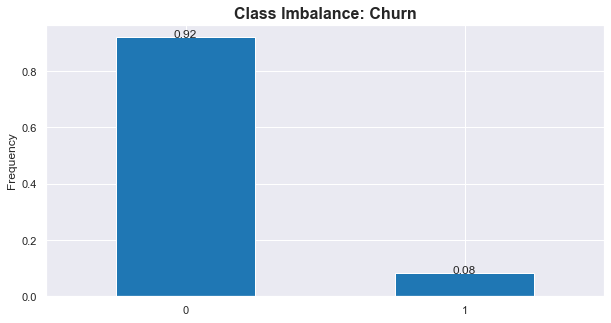

In [22]:
# define a custom function to display data-labels for bar chart:

def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        

sns.set_theme(palette = "tab10")
plt.figure(figsize=(10,5 ))
churn_HVC["churn"].value_counts(normalize = True).plot.bar()
plt.title ("Class Imbalance: Churn", fontweight = 700, fontsize = 16)
plt.xticks(rotation=0)
plt.ylabel("Frequency")
x_datalabel = churn_HVC["churn"].value_counts().index.tolist()
y_datalabel = round(churn_HVC["churn"].value_counts(normalize = True),2).values.tolist()

add_labels(x_datalabel,y_datalabel)

plt.show()

# From Above reseult we conclude that only 0.08% are Churn, which shows the data is Highly Volatile in Nature.

In [23]:
# lets drop all columns which are corresponding to Month _9:

month_9_col = [col for col in churn_HVC.columns if '_9' in col]
churn_HVC.drop(month_9_col, axis=1, inplace = True)
churn_HVC.shape

(30001, 178)

## Missing Values Treatment:

In [24]:
round(churn_HVC.isna().sum()/len(churn_HVC)*100, 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.75
std_og_t2o_mou               0.75
loc_ic_t2o_mou               0.75
last_date_of_month_6         0.00
last_date_of_month_7         0.09
last_date_of_month_8         0.55
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  1.82
onnet_mou_7                  1.79
onnet_mou_8                  3.91
offnet_mou_6                 1.82
offnet_mou_7                 1.79
offnet_mou_8                 3.91
roam_ic_mou_6                1.82
roam_ic_mou_7                1.79
roam_ic_mou_8                3.91
roam_og_mou_6                1.82
roam_og_mou_7                1.79
roam_og_mou_8                3.91
loc_og_t2t_mou_6             1.82
loc_og_t2t_mou_7             1.79
loc_og_t2t_mou_8             3.91
loc_og_t2m_mou_6             1.82
loc_og_t2m_mou_7             1.79
loc_og_t2m_mou_8             3.91
loc_og_t2f_mou

In [25]:
null_values(churn_HVC)

Column Name  Missing_Value_%
151          night_pck_user_8        46.825106
133           count_rech_3g_8        46.825106
121  date_of_last_rech_data_8        46.825106
166                 fb_user_8        46.825106
130           count_rech_2g_8        46.825106
148                 arpu_2g_8        46.825106
145                 arpu_3g_8        46.825106
146                 arpu_2g_6        44.148528
164                 fb_user_6        44.148528
131           count_rech_3g_6        44.148528
119  date_of_last_rech_data_6        44.148528
128           count_rech_2g_6        44.148528
143                 arpu_3g_6        44.148528
149          night_pck_user_6        44.148528
147                 arpu_2g_7        43.145228
120  date_of_last_rech_data_7        43.145228
144                 arpu_3g_7        43.145228
150          night_pck_user_7        43.145228
129           count_rech_2g_7        43.145228
132           count_rech_3g_7        43.145228
165                 fb_user_7        43.145228
88           std_ic_t2o_mou_8         3.913203
43           std_og_t2m_mou_8         3.913203
49           std_og_t2c_mou_8         3.913203
40           std_og_t2t_mou_8         3.913203
85           std_ic_t2f_mou_8         3.913203
46           std_og_t2f_mou_8         3.913203
82           std_ic_t2m_mou_8         3.913203
70           loc_ic_t2m_mou_8         3.913203
79           std_ic_t2t_mou_8         3.913203
52               std_og_mou_8         3.913203
76               loc_ic_mou_8         3.913203
55               isd_og_mou_8         3.913203
73           loc_ic_t2f_mou_8         3.913203
58               spl_og_mou_8         3.913203
67           loc_ic_t2t_mou_8         3.913203
91               std_ic_mou_8         3.913203
31           loc_og_t2f_mou_8         3.913203
37               loc_og_mou_8         3.913203
103               ic_others_8         3.913203
13                onnet_mou_8         3.913203
16               offnet_mou_8         3.913203
19              roam_ic_mou_8         3.913203
22              roam_og_mou_8         3.913203
25           loc_og_t2t_mou_8         3.913203
28           loc_og_t2m_mou_8         3.913203
100              isd_ic_mou_8         3.913203
34           loc_og_t2c_mou_8         3.913203
97               spl_ic_mou_8         3.913203
61                og_others_8         3.913203
115       date_of_last_rech_8         1.943269
65           loc_ic_t2t_mou_6         1.816606
101               ic_others_6         1.816606
80           std_ic_t2m_mou_6         1.816606
83           std_ic_t2f_mou_6         1.816606
95               spl_ic_mou_6         1.816606
77           std_ic_t2t_mou_6         1.816606
74               loc_ic_mou_6         1.816606
98               isd_ic_mou_6         1.816606
86           std_ic_t2o_mou_6         1.816606
71           loc_ic_t2f_mou_6         1.816606
68           loc_ic_t2m_mou_6         1.816606
89               std_ic_mou_6         1.816606
20              roam_og_mou_6         1.816606
11                onnet_mou_6         1.816606
41           std_og_t2m_mou_6         1.816606
35               loc_og_mou_6         1.816606
44           std_og_t2f_mou_6         1.816606
32           loc_og_t2c_mou_6         1.816606
47           std_og_t2c_mou_6         1.816606
29           loc_og_t2f_mou_6         1.816606
50               std_og_mou_6         1.816606
38           std_og_t2t_mou_6         1.816606
53               isd_og_mou_6         1.816606
26           loc_og_t2m_mou_6         1.816606
56               spl_og_mou_6         1.816606
14               offnet_mou_6         1.816606
17              roam_ic_mou_6         1.816606
59                og_others_6         1.816606
23           loc_og_t2t_mou_6         1.816606
12                onnet_mou_7         1.789940
27           loc_og_t2m_mou_7         1.789940
15               offnet_mou_7         1.789940
24           loc_og_t2t_mou_7         1.789940
102               ic_ot

# Checking columns with more than 40% missing values

In [26]:
# columns with more than 40% missing values

missing_40 = null_values(churn_HVC)[null_values(churn_HVC)["Missing_Value_%"]>40]
missing_40

Column Name  Missing_Value_%
151          night_pck_user_8        46.825106
133           count_rech_3g_8        46.825106
121  date_of_last_rech_data_8        46.825106
166                 fb_user_8        46.825106
130           count_rech_2g_8        46.825106
148                 arpu_2g_8        46.825106
145                 arpu_3g_8        46.825106
146                 arpu_2g_6        44.148528
164                 fb_user_6        44.148528
131           count_rech_3g_6        44.148528
119  date_of_last_rech_data_6        44.148528
128           count_rech_2g_6        44.148528
143                 arpu_3g_6        44.148528
149          night_pck_user_6        44.148528
147                 arpu_2g_7        43.145228
120  date_of_last_rech_data_7        43.145228
144                 arpu_3g_7        43.145228
150          night_pck_user_7        43.145228
129           count_rech_2g_7        43.145228
132           count_rech_3g_7        43.145228
165                 fb_user_7        43.145228

In [27]:
# Lets check rows with maximum nulls

#row_null_count = churn_HVC.isna().sum(axis=1)
#row_null_count.sort_values(ascending=False)

In [28]:
# lets check such rows wih 117 missing values

#churn_HVC.loc[row_null_count[row_null_count==115].index]

#### Looks like above rows have all columns null except for month 6. In our analysis we are considering that month 6 and 7 are good phase and 8 as action phase. Since these customers could not give us the insight based on our assumption. We should drop these rows where 115 columns have null values. These rows have around 70% values null

In [29]:
# Confirm to see if all the columns are missing the same  

churn_HVC[missing_40][churn_HVC[missing_40]['arpu_3g_6'].isnull()].head(20)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  \
0             NaN        NaN             NaN             NaN             NaN                  NaT                  NaT                  NaT     NaN     NaN     NaN          NaN          NaN          NaN           NaN           NaN           NaN            NaN            NaN            NaN            NaN            NaN            NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN          NaN          NaN          NaN             NaN   
1             NaN        NaN             NaN             NaN             NaN                  NaT                  NaT                  NaT     NaN     NaN     NaN          NaN          NaN          NaN           NaN           NaN           NaN            NaN            NaN            NaN            NaN            NaN            NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN          NaN          NaN          NaN             NaN   
2             NaN        NaN             NaN             NaN             NaN                  NaT                  NaT                  NaT     NaN     NaN     NaN          NaN          NaN          NaN           NaN           NaN           NaN            NaN            NaN            NaN            NaN            NaN            NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN          NaN          NaN          NaN             NaN   
3             NaN        NaN    

# Creating list of columns that contain more than 40% Null Values

In [30]:
# create a list of columns:

Null_40 = ['count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

In [31]:
# Droping columns with more than 40% missing values:

churn_HVC[Null_40] = churn_HVC[Null_40].fillna(0)

In [32]:
# Date columns are not required. Lets drop all date columns

date_col = [col for col in churn_HVC.columns if 'date' in col]
churn_HVC.drop(date_col, axis=1, inplace=True)
[col for col in churn_HVC.columns if 'date' in col]

[]

In [33]:
# Checking Shape and Size
churn_HVC.shape

(30001, 169)

In [34]:
# get the list of missing values after dropping the features with more than 40% missing values:

missing_mou= null_values(churn_HVC)[null_values(churn_HVC)["Missing_Value_%"]>0]
missing_mou

Column Name  Missing_Value_%
64   loc_ic_t2t_mou_8         3.913203
22   loc_og_t2t_mou_8         3.913203
85   std_ic_t2o_mou_8         3.913203
28   loc_og_t2f_mou_8         3.913203
31   loc_og_t2c_mou_8         3.913203
67   loc_ic_t2m_mou_8         3.913203
34       loc_og_mou_8         3.913203
37   std_og_t2t_mou_8         3.913203
40   std_og_t2m_mou_8         3.913203
79   std_ic_t2m_mou_8         3.913203
43   std_og_t2f_mou_8         3.913203
46   std_og_t2c_mou_8         3.913203
49       std_og_mou_8         3.913203
76   std_ic_t2t_mou_8         3.913203
52       isd_og_mou_8         3.913203
55       spl_og_mou_8         3.913203
58        og_others_8         3.913203
73       loc_ic_mou_8         3.913203
70   loc_ic_t2f_mou_8         3.913203
25   loc_og_t2m_mou_8         3.913203
82   std_ic_t2f_mou_8         3.913203
94       spl_ic_mou_8         3.913203
100       ic_others_8         3.913203
19      roam_og_mou_8         3.913203
88       std_ic_mou_8         3.913203
13       offnet_mou_8         3.913203
16      roam_ic_mou_8         3.913203
10        onnet_mou_8         3.913203
97       isd_ic_mou_8         3.913203
44   std_og_t2c_mou_6         1.816606
95       isd_ic_mou_6         1.816606
47       std_og_mou_6         1.816606
77   std_ic_t2m_mou_6         1.816606
8         onnet_mou_6         1.816606
50       isd_og_mou_6         1.816606
56        og_others_6         1.816606
53       spl_og_mou_6         1.816606
74   std_ic_t2t_mou_6         1.816606
98        ic_others_6         1.816606
71       loc_ic_mou_6         1.816606
62   loc_ic_t2t_mou_6         1.816606
65   loc_ic_t2m_mou_6         1.816606
20   loc_og_t2t_mou_6         1.816606
68   loc_ic_t2f_mou_6         1.816606
11       offnet_mou_6         1.816606
14      roam_ic_mou_6         1.816606
23   loc_og_t2m_mou_6         1.816606
86       std_ic_mou_6         1.816606
26   loc_og_t2f_mou_6         1.816606
17      roam_og_mou_6         1.816606
29   loc_og_t2c_mou_6         1.816606
83   std_ic_t2o_mou_6         1.816606
32       loc_og_mou_6         1.816606
92       spl_ic_mou_6         1.816606
35   std_og_t2t_mou_6         1.816606
38   std_og_t2m_mou_6         1.816606
80   std_ic_t2f_mou_6         1.816606
41   std_og_t2f_mou_6         1.816606
75   std_ic_t2t_mou_7         1.789940
78   std_ic_t2m_mou_7         1.789940
96       isd_ic_mou_7         1.789940
81   std_ic_t2f_mou_7         1.789940
99        ic_others_7         1.789940
72       loc_ic_mou_7         1.789940
93       spl_ic_mou_7         1.789940
69   loc_ic_t2f_mou_7         1.789940
87       std_ic_mou_7         1.789940
84   std_ic_t2o_mou_7         1.789940
66   loc_ic_t2m_mou_7         1.789940
42   std_og_t2f_mou_7         1.789940
21   loc_og_t2t_mou_7         1.789940
24   loc_og_t2m_mou_7         1.789940
27   loc_og_t2f_mou_7         1.789940
12       offnet_mou_7         1.789940
30   loc_og_t2c_mou_7         1.789940
33       loc_og_mou_7         1.789940
36   std_og_t2t_mou_7         1.789940
39   std_og_t2m_mou_7         1.789940
45   std_og_t2c_mou_7         1.789940
15      roam_ic_mou_7         1.789940
48       std_og_mou_7         1.789940
51       isd_og_mou_7         1.789940
54       spl_og_mou_7         1.789940
57        og_others_7         1.789940
9         onnet_mou_7         1.789940
63   loc_ic_t2t_mou_7         1.789940
18      roam_og_mou_7         1.789940
3      std_og_t2o_mou         0.746642
2      loc_og_t2o_mou         0.746642
4      loc_ic_t2o_mou         0.746642

In [35]:
# impute these missing values in minutes of usage related features with 0 

churn_HVC[missing_mou["Column Name"]] = churn_HVC[missing_mou["Column Name"]].fillna(0)

In [36]:
null_values(churn_HVC)

Column Name  Missing_Value_%
0            mobile_number              0.0
116        max_rech_data_6              0.0
108         max_rech_amt_7              0.0
109         max_rech_amt_8              0.0
110     last_day_rch_amt_6              0.0
111     last_day_rch_amt_7              0.0
112     last_day_rch_amt_8              0.0
113      total_rech_data_6              0.0
114      total_rech_data_7              0.0
115      total_rech_data_8              0.0
117        max_rech_data_7              0.0
85        std_ic_t2o_mou_8              0.0
118        max_rech_data_8              0.0
119        count_rech_2g_6              0.0
120        count_rech_2g_7              0.0
121        count_rech_2g_8              0.0
122        count_rech_3g_6              0.0
123        count_rech_3g_7              0.0
124        count_rech_3g_8              0.0
125     av_rech_amt_data_6              0.0
107         max_rech_amt_6              0.0
106       total_rech_amt_8              0.0
105       total_rech_amt_7              0.0
104       total_rech_amt_6              0.0
87            std_ic_mou_7              0.0
88            std_ic_mou_8              0.0
89          total_ic_mou_6              0.0
90          total_ic_mou_7              0.0
91          total_ic_mou_8              0.0
92            spl_ic_mou_6              0.0
93            spl_ic_mou_7              0.0
94            spl_ic_mou_8              0.0
95            isd_ic_mou_6              0.0
96            isd_ic_mou_7              0.0
97            isd_ic_mou_8              0.0
98             ic_others_6              0.0
99             ic_others_7              0.0
100            ic_others_8              0.0
101       total_rech_num_6              0.0
102       total_rech_num_7              0.0
103       total_rech_num_8              0.0
126     av_rech_amt_data_7              0.0
127     av_rech_amt_data_8              0.0
128            vol_2g_mb_6              0.0
149           monthly_3g_6              0.0
151           monthly_3g_8              0.0
152            sachet_3g_6              0.0
153            sachet_3g_7              0.0
154            sachet_3g_8              0.0
155              fb_user_6              0.0
156              fb_user_7              0.0
157              fb_user_8              0.0
158                    aon              0.0
159               3g_vbc_8              0.0
160               3g_vbc_7              0.0
161               3g_vbc_6              0.0
162  total_data_rech_amt_6              0.0
163  total_data_rech_amt_7              0.0
164  total_data_rech_amt_8              0.0
165         tot_amt_data_6              0.0
166         tot_amt_data_7              0.0
167       avg_amt_data_6_7              0.0
150           monthly_3g_7              0.0
148            sachet_2g_8              0.0
129            vol_2g_mb_7              0.0
147            sachet_2g_7              0.0
130            vol_2g_mb_8              0.0
131            vol_3g_mb_6              0.0
132            vol_3g_mb_7              0.0
133            vol_3g_mb_8              0.0
134              arpu_3g_6              0.0
135              arpu_3g_7              0.0
136              arpu_3g_8              0.0
137              arpu_2g_6              0.0
138              arpu_2g_7              0.0
139              arpu_2g_8              0.0
140       night_pck_user_6              0.0
141       night_pck_user_7              0.0
142       night_pck_user_8              0.0
143           monthly_2g_6              0.0
144           monthly_2g_7              0.0
145           monthly_2g_8              0.0
146            sachet_2g_6              0.0
86            std_ic_mou_6              0.0
84        std_ic_t2o_mou_7              0.0
1                circle_id              0.0
31        loc_og_t2c_mou_8              0.0
23        loc_og_t2m_mou_6              0.0
24        loc_og_t2m_mou_7              0.0
25        loc_og_t2m_mou_8              0.0
26        l

In [37]:
churn_HVC.shape

(30001, 169)

In [38]:
# lets capture all column prefixes so that we can automate value imputations

column_prefixes = churn_HVC.loc[:, churn_HVC.columns.str.endswith("_6") | churn_HVC.columns.str.endswith("_7")].columns.str[:-2]
column_prefixes = set(column_prefixes)
column_prefixes

{'3g_vbc',
 'arpu',
 'arpu_2g',
 'arpu_3g',
 'av_rech_amt_data',
 'avg_amt_data_6',
 'count_rech_2g',
 'count_rech_3g',
 'fb_user',
 'ic_others',
 'isd_ic_mou',
 'isd_og_mou',
 'last_day_rch_amt',
 'loc_ic_mou',
 'loc_ic_t2f_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2t_mou',
 'loc_og_mou',
 'loc_og_t2c_mou',
 'loc_og_t2f_mou',
 'loc_og_t2m_mou',
 'loc_og_t2t_mou',
 'max_rech_amt',
 'max_rech_data',
 'monthly_2g',
 'monthly_3g',
 'night_pck_user',
 'offnet_mou',
 'og_others',
 'onnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'sachet_2g',
 'sachet_3g',
 'spl_ic_mou',
 'spl_og_mou',
 'std_ic_mou',
 'std_ic_t2f_mou',
 'std_ic_t2m_mou',
 'std_ic_t2o_mou',
 'std_ic_t2t_mou',
 'std_og_mou',
 'std_og_t2c_mou',
 'std_og_t2f_mou',
 'std_og_t2m_mou',
 'std_og_t2t_mou',
 'tot_amt_data',
 'total_data_rech_amt',
 'total_ic_mou',
 'total_og_mou',
 'total_rech_amt',
 'total_rech_data',
 'total_rech_num',
 'vol_2g_mb',
 'vol_3g_mb'}

## Dropping Redundant Features:

### Features with only one unique value:

In [39]:
# create a list of all features that have only one unique value: 

churn_HVC_unique = churn_HVC.columns[(churn_HVC.nunique() ==1)]
churn_HVC_unique

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'], dtype='object')

In [40]:
# drop the columns that have only one unique values: 

churn_HVC.drop(churn_HVC_unique, axis=1, inplace=True)
churn_HVC.shape

(30001, 159)

# For features where total columns are available we will drop individual columns as this will help reducing both multicollinearity and dimentionality

In [41]:
# dropping columns whose totals are available as a different attribute

individual_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                   'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                   'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']

churn_HVC.drop(individual_cols, axis = 1, inplace = True)

In [42]:
# Drop the column 'mobile_number' as it does not add any information 

churn_HVC.drop('mobile_number', axis=1, inplace=True)
churn_HVC.shape

(30001, 110)

### Now Lets Check for Duplication of Rows

In [43]:
# check duplicate rows in the df:

duplicate = churn_HVC[churn_HVC.duplicated()]
duplicate

Empty DataFrame
Columns: [arpu_6, arpu_7, arpu_8, onnet_mou_6, onnet_mou_7, onnet_mou_8, offnet_mou_6, offnet_mou_7, offnet_mou_8, roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8, roam_og_mou_6, roam_og_mou_7, roam_og_mou_8, loc_og_mou_6, loc_og_mou_7, loc_og_mou_8, std_og_mou_6, std_og_mou_7, std_og_mou_8, isd_og_mou_6, isd_og_mou_7, isd_og_mou_8, spl_og_mou_6, spl_og_mou_7, spl_og_mou_8, og_others_6, og_others_7, og_others_8, total_og_mou_6, total_og_mou_7, total_og_mou_8, loc_ic_mou_6, loc_ic_mou_7, loc_ic_mou_8, std_ic_mou_6, std_ic_mou_7, std_ic_mou_8, total_ic_mou_6, total_ic_mou_7, total_ic_mou_8, spl_ic_mou_6, spl_ic_mou_7, spl_ic_mou_8, isd_ic_mou_6, isd_ic_mou_7, isd_ic_mou_8, ic_others_6, ic_others_7, ic_others_8, total_rech_num_6, total_rech_num_7, total_rech_num_8, total_rech_amt_6, total_rech_amt_7, total_rech_amt_8, max_rech_amt_6, max_rech_amt_7, max_rech_amt_8, total_rech_data_6, total_rech_data_7, total_rech_data_8, max_rech_data_6, max_rech_data_7, max_rech_data_8, count_rech_2g_6, count_rech_2g_7, count_rech_2g_8, count_rech_3g_6, count_rech_3g_7, count_rech_3g_8, av_rech_amt_data_6, av_rech_amt_data_7, av_rech_amt_data_8, vol_2g_mb_6, vol_2g_mb_7, vol_2g_mb_8, vol_3g_mb_6, vol_3g_mb_7, vol_3g_mb_8, night_pck_user_6, night_pck_user_7, night_pck_user_8, monthly_2g_6, monthly_2g_7, monthly_2g_8, sachet_2g_6, sachet_2g_7, sachet_2g_8, monthly_3g_6, monthly_3g_7, monthly_3g_8, sachet_3g_6, sachet_3g_7, sachet_3g_8, fb_user_6, fb_user_7, fb_user_8, aon, ...]
Index: []

In [44]:
churn_HVC.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  \
0   197.385   214.816   213.803         0.00         0.00         0.00          0.00          0.00          0.00           0.00           0.00           0.00           0.00           0.00           0.00          0.00          0.00          0.00          0.00          0.00          0.00           0.0          0.00          0.00           0.0           0.0          0.00          0.0          0.0          0.0            0.00            0.00            0.00          0.00          0.00          5.44          0.00          0.00          0.00            0.00            0.00            5.44          0.00           0.0           0.0          0.00          0.00          0.00         0.00         0.00         0.00                 4                 3                 2               362               252               252             252             252             252                1.0                1.0                1.0            252.0            252.0            252.0              0.0   
1  1069.180  1349.850  3171.480        57.84        54.68        52.29        453.43        567.16        325.91          16.23          33.49          31.64          23.74          12.59          38.06        422.16        533.91        255.79         60.86         75.14         77.84           0.0          0.18         10.01           4.5           0.0          6.50          0.0          0.0          0.0          487.53          609.24          350.16        427.88        355.23        188.04        180.54        173.08        193.94          626.46          558.04          428.74          0.21           0.0           0.0          2.06         14.53         31.59        15.74        15.19        15.14                 5                 5                 7              1580               790              3638            1580             790            1580                0.0                0.0                0.0              0.0              0.0              0.0              0.0   
2   378.721   492.223   137.362       413.69       351.03        35.08         94.66         80.63        136.48           0.00           0.00           0.00           0.00           0.00           0.00        378.09        288.18         63.04        130.26        143.48         98.28           0.0          0.00          0.00           0.0           0.0         10.23          0.0          0.0          0.0          508.36          431.66          171.56         81.43         23.83         15.79         22.43          4.66          0.75          103.86           28.49           16.54          0.00           0.0           0.0          0.00          0.00          0.00         0.00         0.00         0.00                19                21                14               437               601               120              90             154              30                0.0                2.0                3.0              0.0            154.0             23.0              0.0   
3   514.453   597

# Exploratory Data Analysis:

Text(0.5, 1.0, 'Churn Distribution')

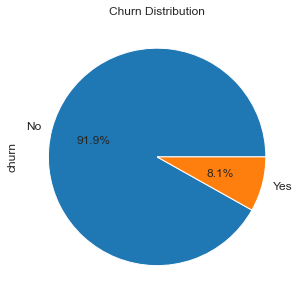

In [45]:
# Let's check percentage of churners

Churn_Percent = (churn_HVC['churn'].value_counts()*100.0 /len(churn_HVC)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
Churn_Percent.set_title('Churn Distribution', fontsize = 12)

In [46]:
churn_HVC.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8   og_others_6   og_others_7   og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8   ic_others_6   ic_others_7   ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   30001.000000   30001.000000   30001.000000   30001.000000   30001.000000   30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000    30001.000000    30001.000000    30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000    30001.000000    30001.000000    30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000    30001.000000    30001.000000    30001.000000       30001.000000       30001.000000       30001.000000     30001.000000     30001.000000   
mean     558.490824    560.782203    508.597957    260.793024    267.819295    234.112539    373.693961    378.103169    335.077044      16.110355      12.642504      12.500551      26.571547      20.152086      19.865615    254.080388    255.116292    235.728174    347.125955    363.984508    307.379315      2.171525      2.105743      1.948970      5.818270      7.108646      6.557204      0.661092      0.042905      0.057607      609.866251      628.366047      551.678812    231.153776    234.307412    223.264679     46.789434     49.046114     44.401653      289.950496      296.756987      279.922931      0.061035      0.019765      0.026567     10.784689     11.875796     10.998257      1.153449      1.500338      1.224455         11.851005         11.718843          9.972868        660.732342        660.498017        584.365454      169.284824      172.201727      160.144462           1.667711           1.853805           1.621913        78.079564        79.841805   
std      460.640461    479.776947    501.961981    459.644368    479.993989    458.448598    482.523558    498.923555    482.062509      76.302156      75.785903      74.125281     116.205525      96.100428     104.719009    378.339061    375.418979    363.370172    608.629048    639.799336    608.976504     45.852190     45.545227     44.712024     17.567237     21.788304     20.311857      4.107960      2.676794      3.315125      690.873430      717.219171      700.478180    314.821196    315.995071    308.315153    137.501469    148.161116    138.813305      365.523475      373.747232      361.175175      0.188058      0.181859      0.110697     76.729297     80.179312     70.600636     13.985934     15.997307     12.783238          9.429132          9.432418          9.274370        561.032865        582.430876        611.245907      175.315958      181.390742      173.207799           2.831233           3.091843           2.996010       112.731468       114.273245   
min    -2258.709000  -2014.045000   -945.808000      0.000000

### From above Discription is is observe that, Variables night_pck_user_6, night_pck_user_7, night_pck_user_8, fb_user_6, fb_user_7 and fb_user_8 are encoded with number 0 and 1 and can be considered categorical in nature.

# Creating a separate list of features that are categorical in nature: 

In [47]:
# creating a separate list of features that are categorical in nature: 

Cotegorical_Col = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

In [48]:
# converting these to int format to help retrieve/eliminate while performing further analysis
churn_HVC[Cotegorical_Col] = churn_HVC[Cotegorical_Col].astype(int)


In [49]:
# checking if the change is correctly reflecting
churn_HVC[Cotegorical_Col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   night_pck_user_6  30001 non-null  int32
 1   night_pck_user_7  30001 non-null  int32
 2   night_pck_user_8  30001 non-null  int32
 3   fb_user_6         30001 non-null  int32
 4   fb_user_7         30001 non-null  int32
 5   fb_user_8         30001 non-null  int32
dtypes: int32(6)
memory usage: 703.3 KB


# Univariate Analysis of Categorical Variables:

In [50]:
# Custom Function Required to add data labels in the graph

def add_data_labels(ax, spacing = 5):

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}%".format(y_value)

        # Create annotation
        plt.annotate(
            label,                        # Use `label` as label
            (x_value, y_value),           # Place label at end of the bar
            xytext = (0, space),          # Vertically shift label by `space`
            textcoords = "offset points", # Interpret `xytext` as offset in points
            ha = 'center',                # Horizontally center label
            va = va)                      # Vertically align label differently for positive and negative values.

### Percent Plots for Analysing Categorical variables

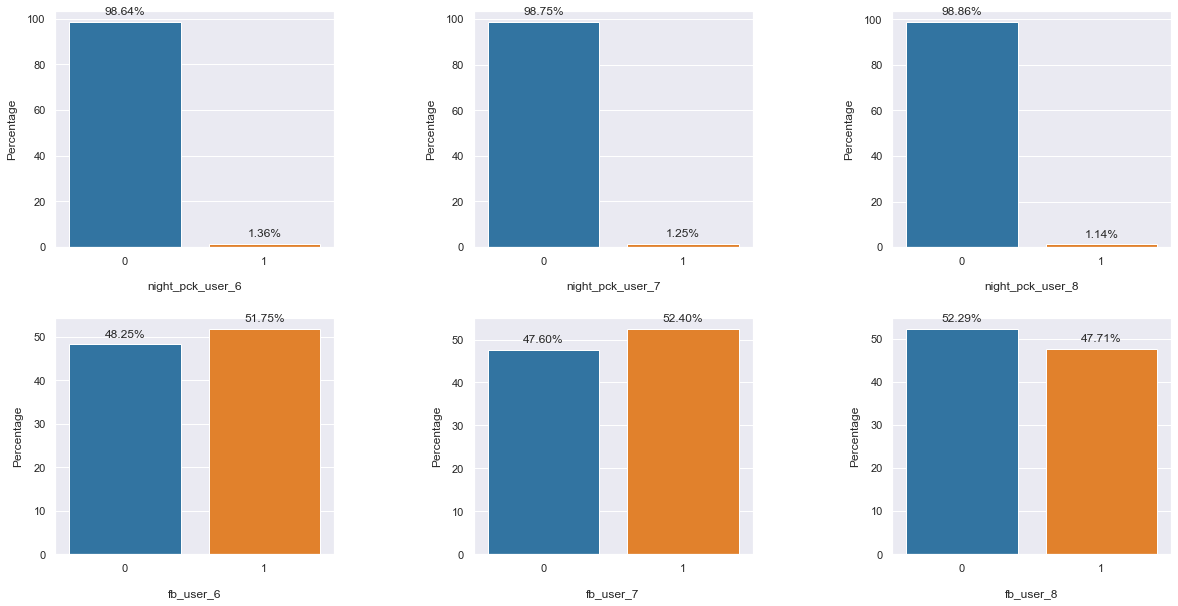

In [51]:
# Percent Plots for Analysing Categorical variables
counter = 1

plt.figure(figsize = (20, 10))

for col in Cotegorical_Col:
        
    series = round(((churn_HVC[col].value_counts(dropna = False))/(len(churn_HVC[col])) * 100), 2)

    plt.subplot(2, 3, counter)
    ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
    plt.xlabel(col, labelpad = 15)
    plt.ylabel('Percentage', labelpad = 10)
    
        # Call Custom Function
    add_data_labels(ax)

    counter += 1

del Cotegorical_Col, counter, ax

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

# Univariate Analysis for Numerical Variables:


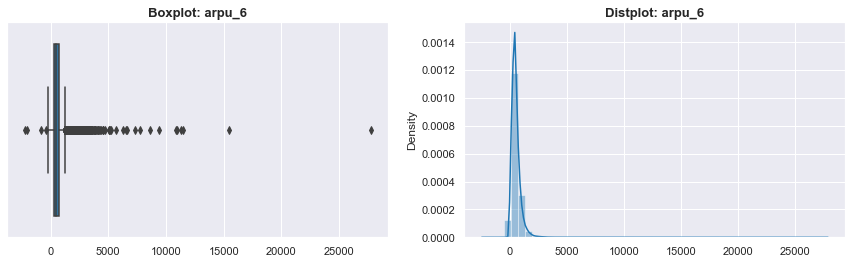

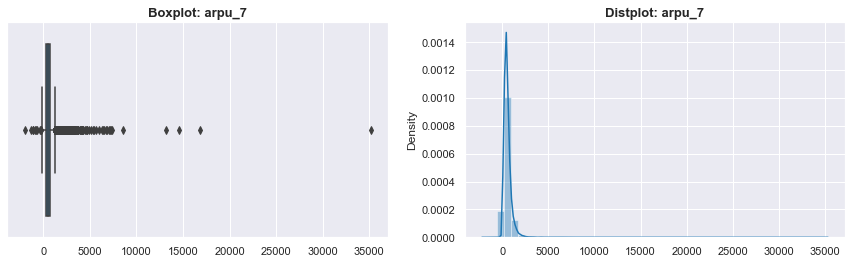

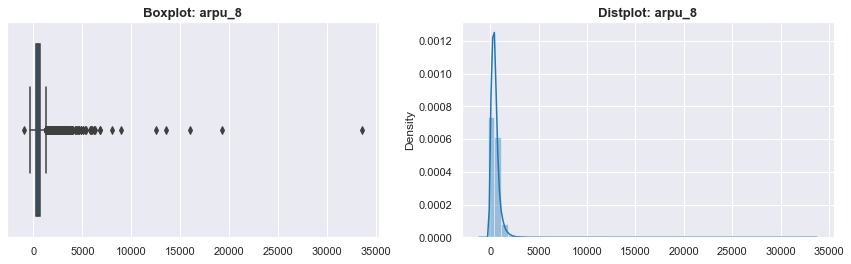

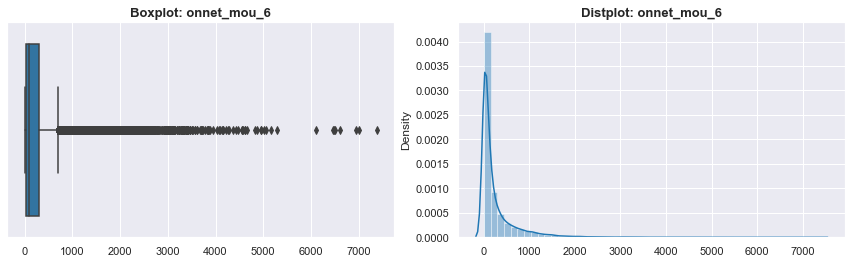

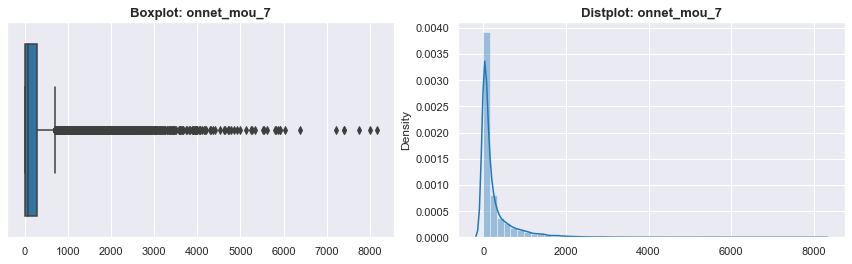

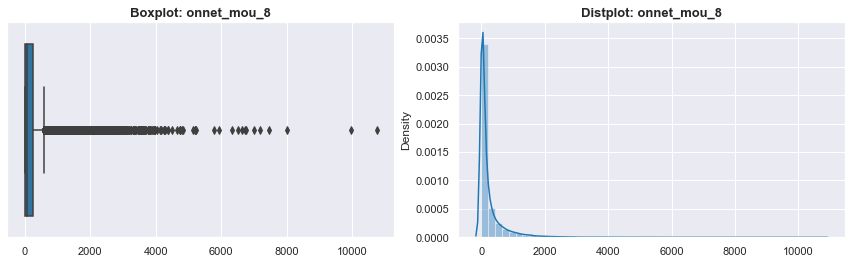

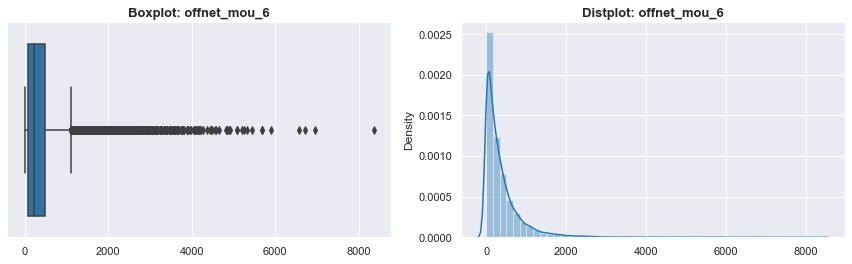

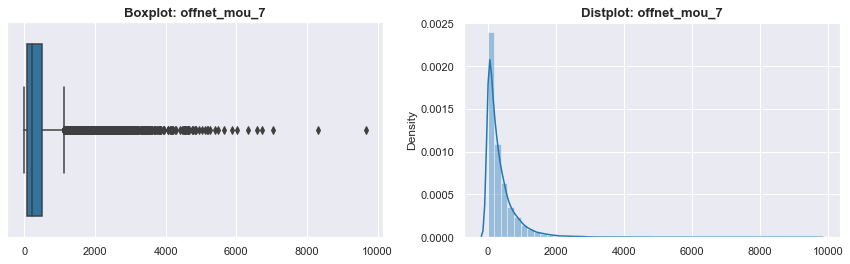

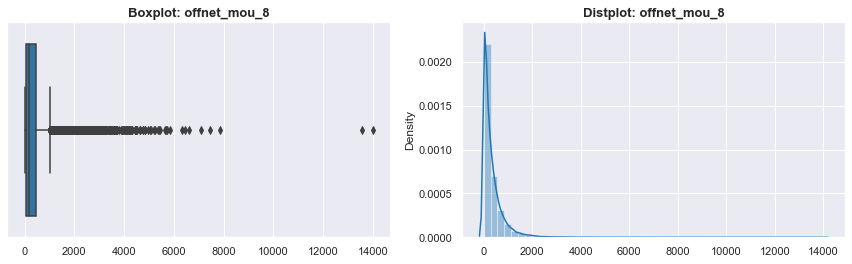

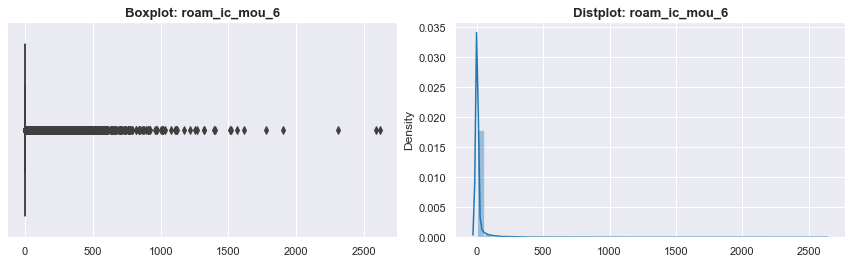

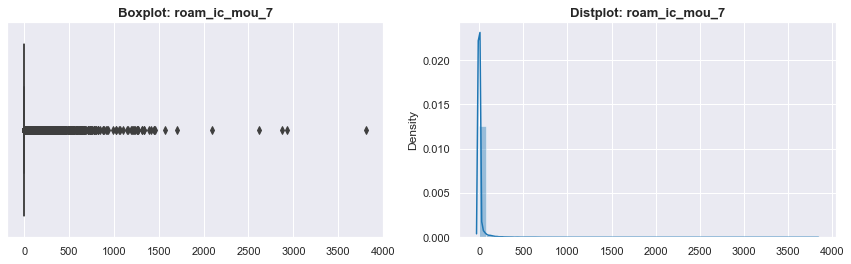

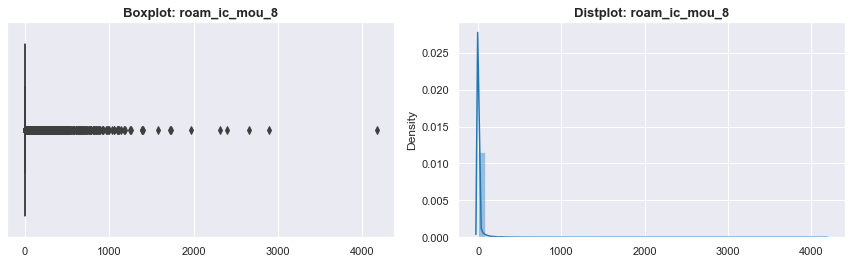

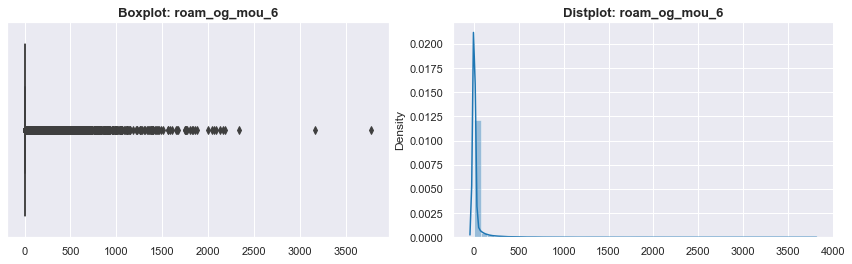

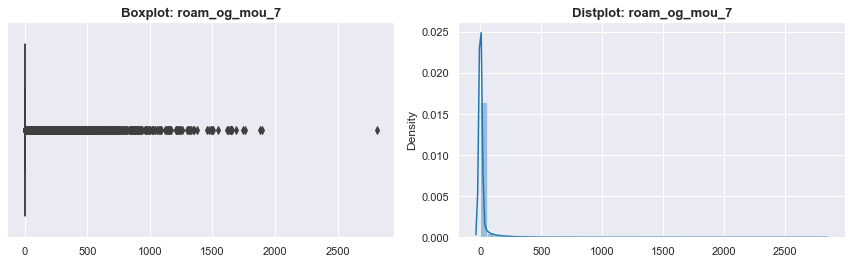

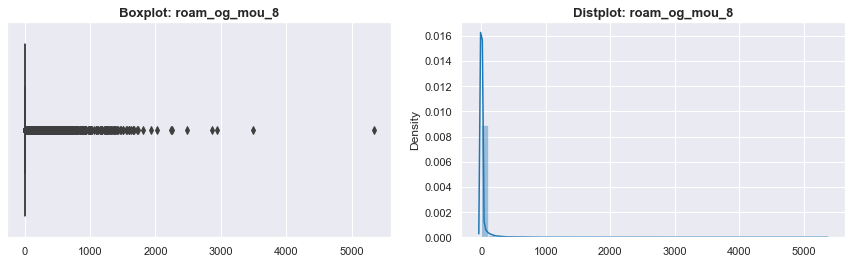

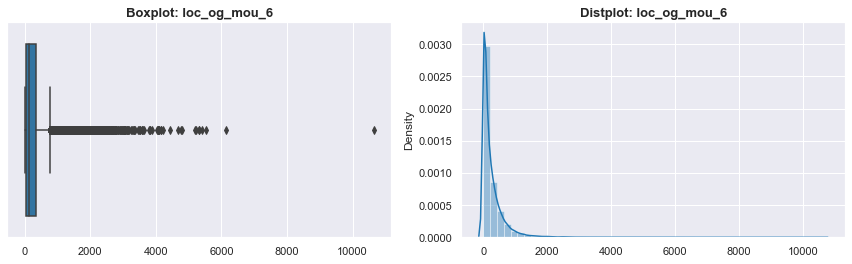

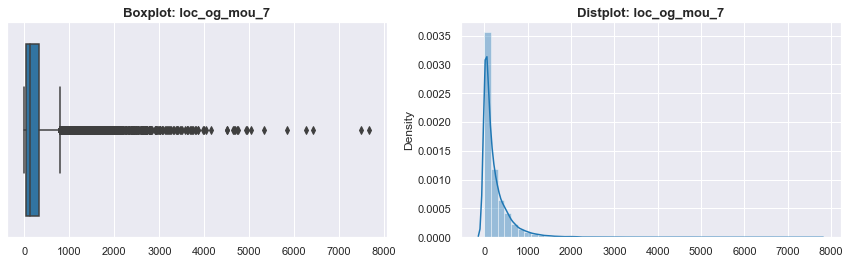

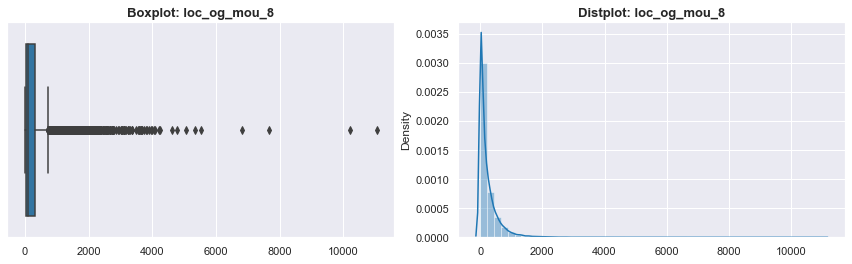

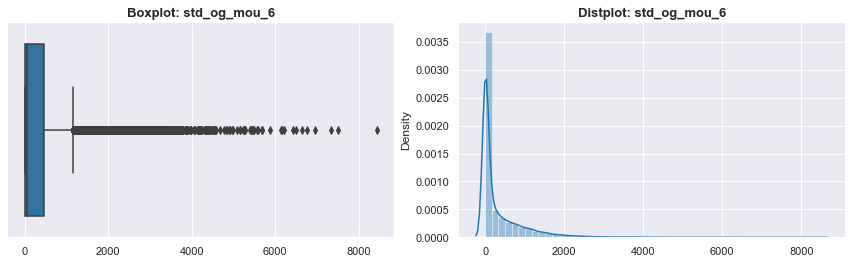

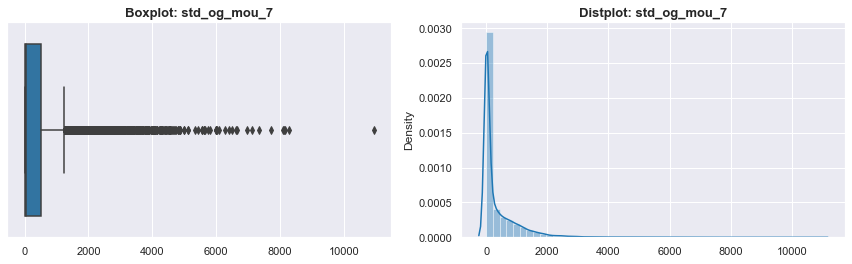

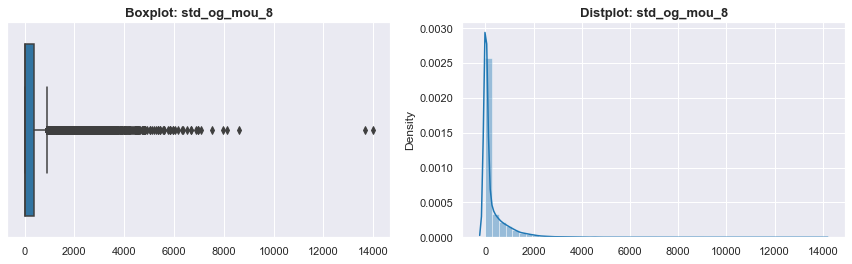

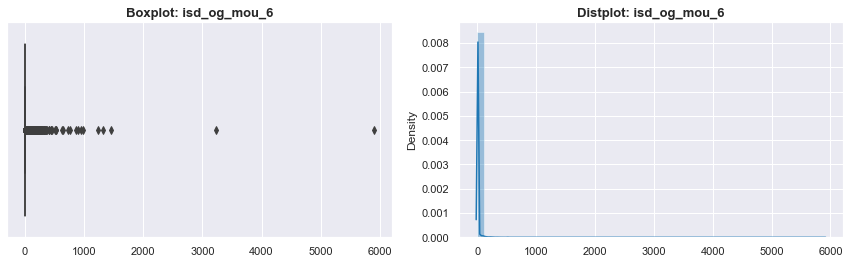

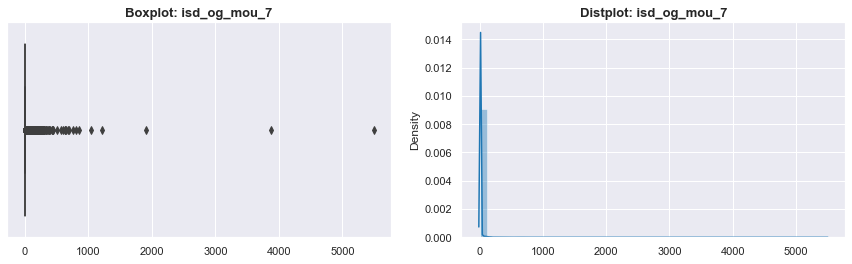

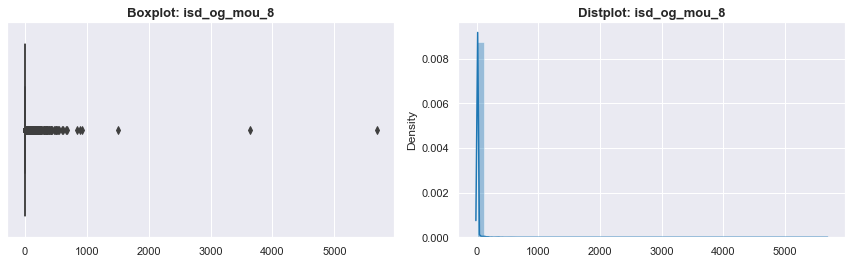

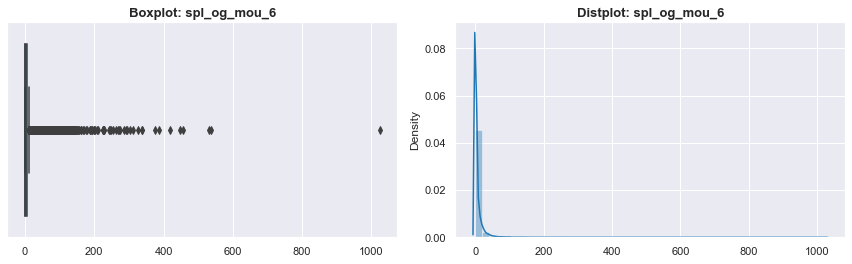

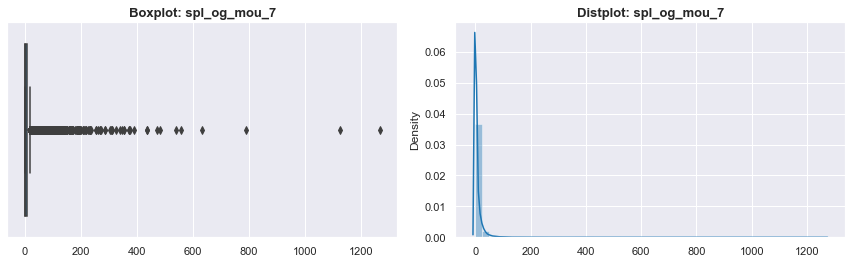

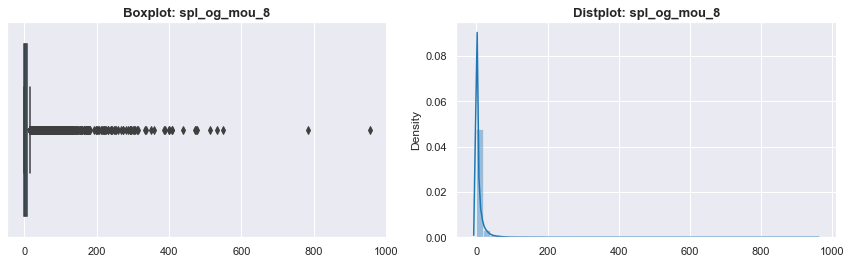

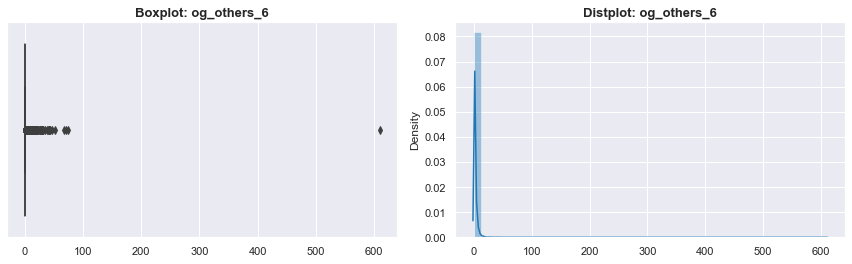

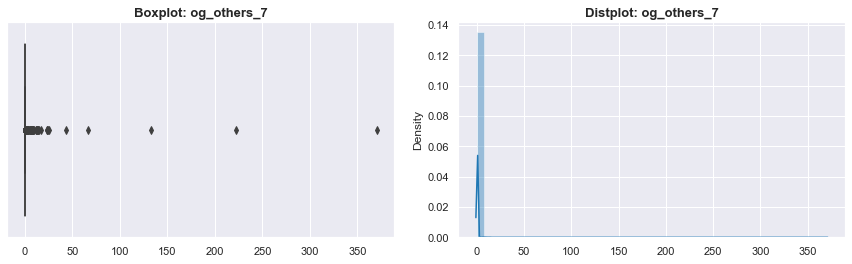

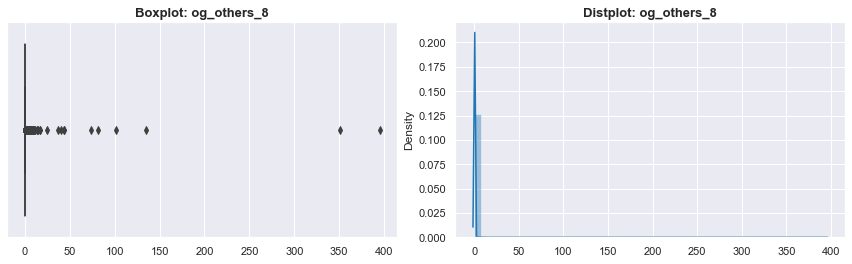

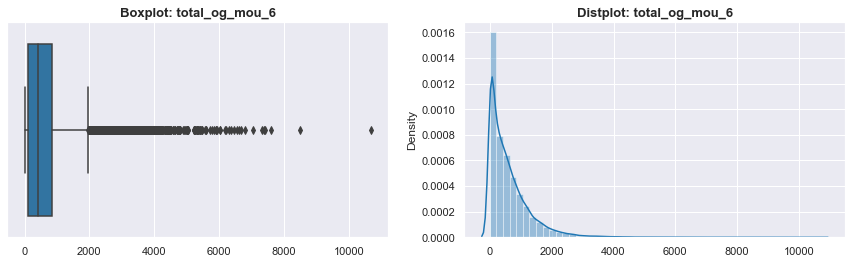

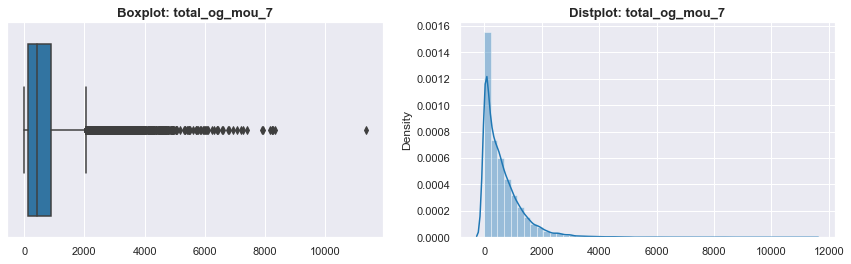

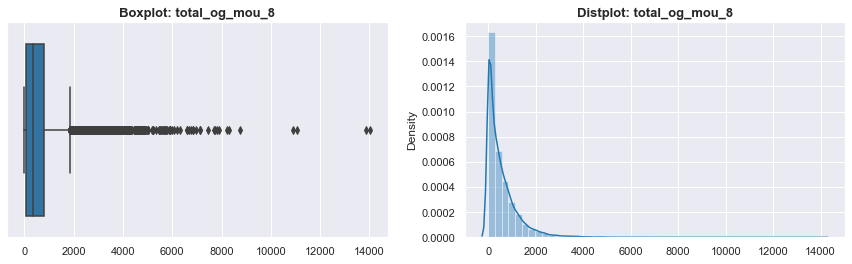

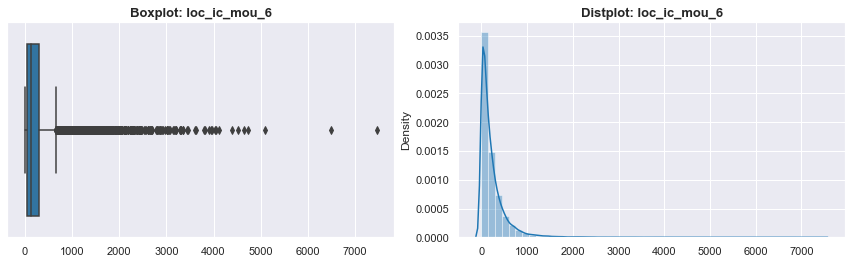

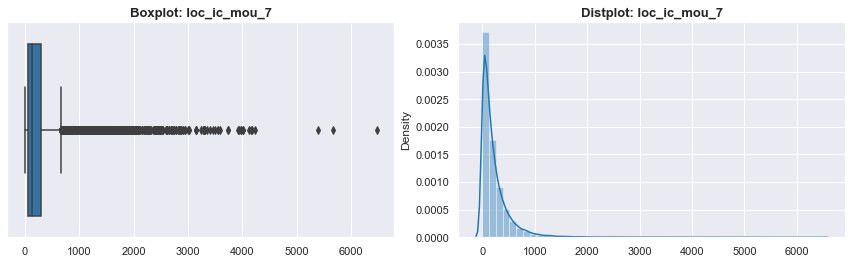

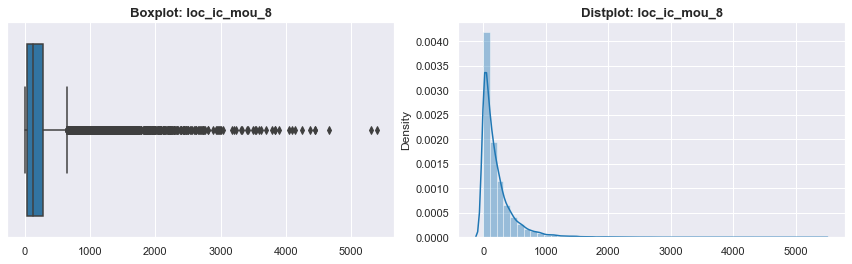

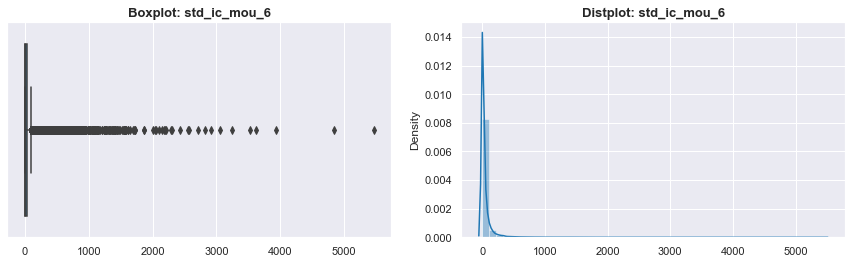

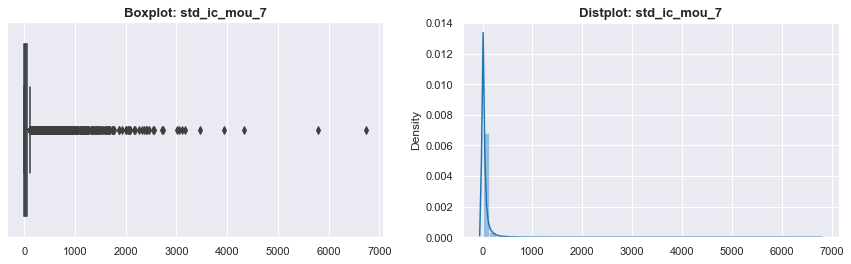

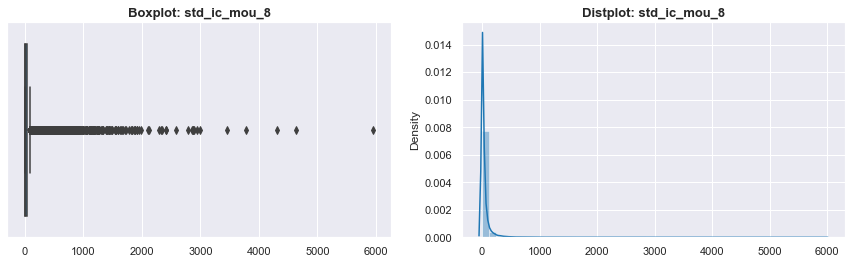

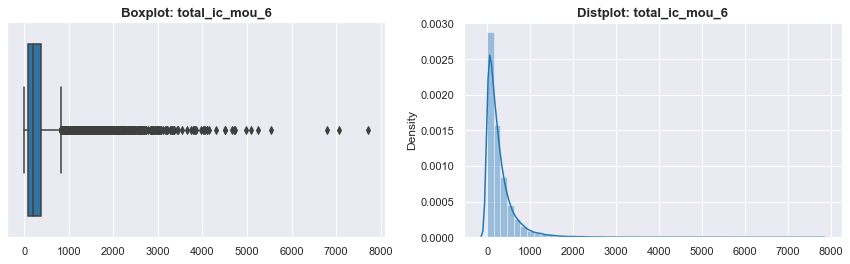

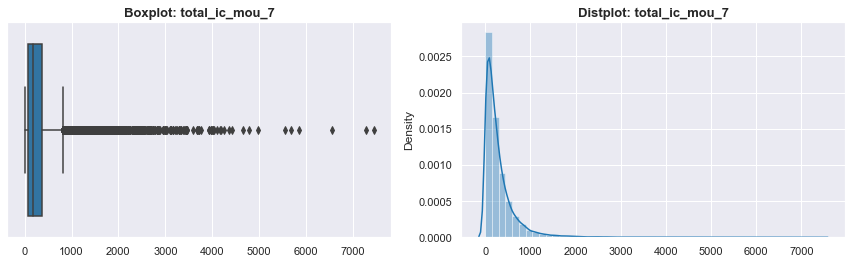

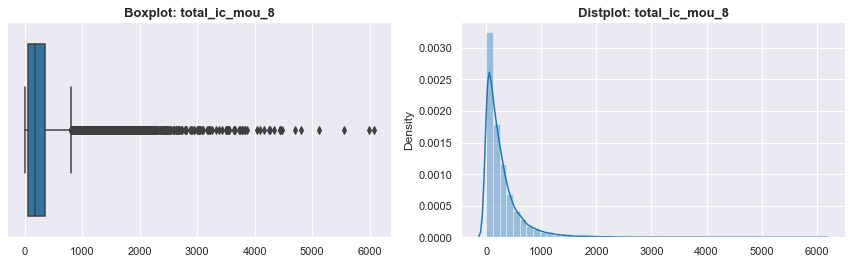

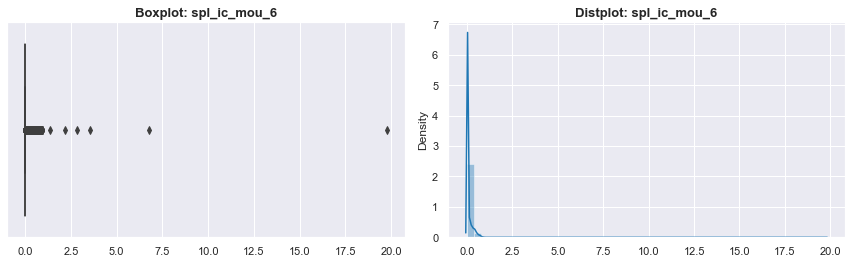

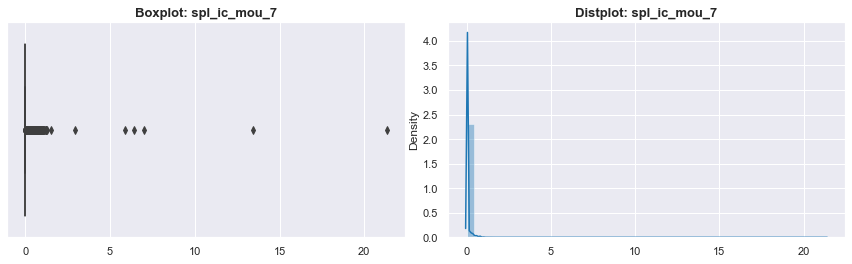

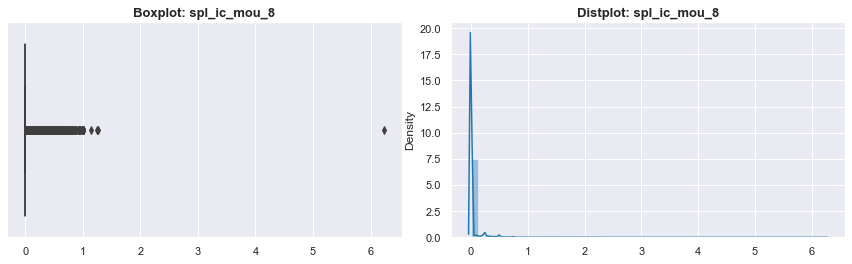

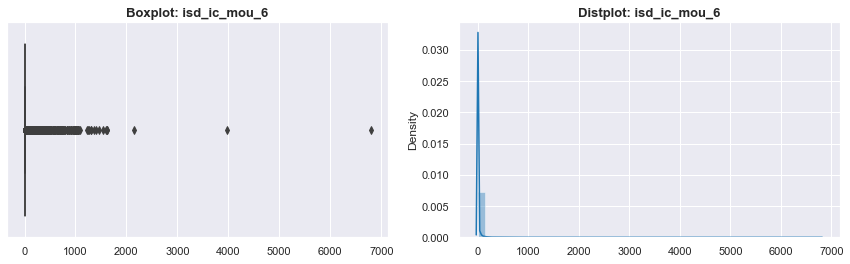

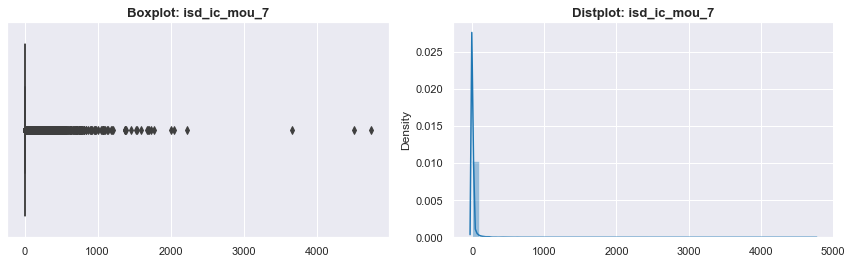

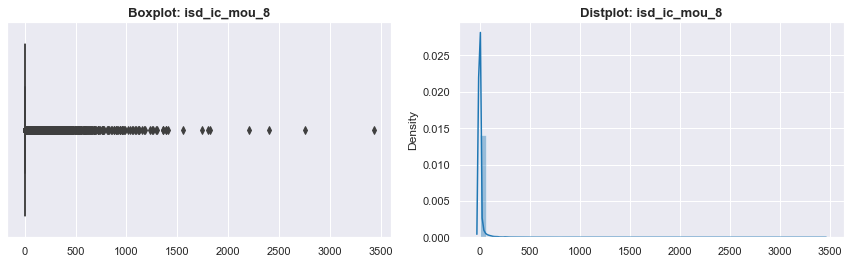

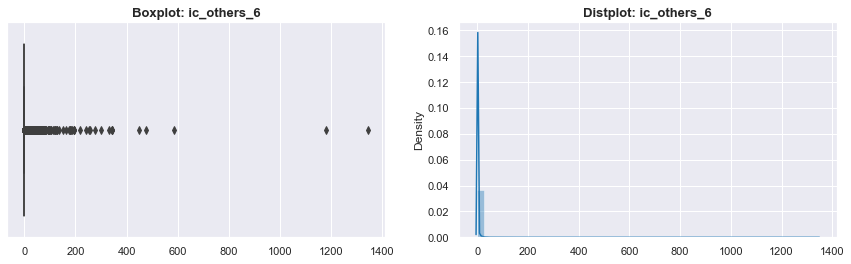

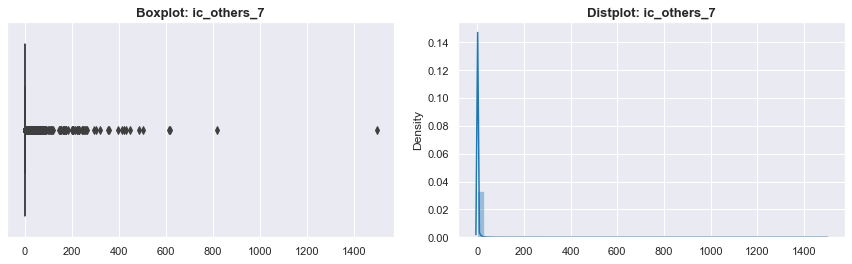

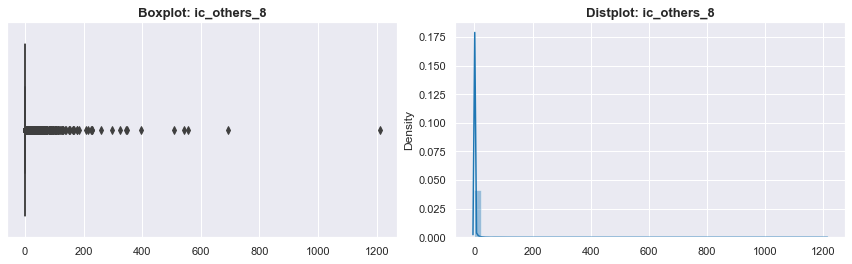

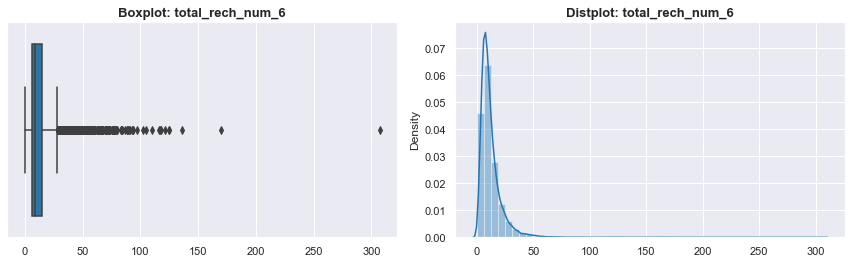

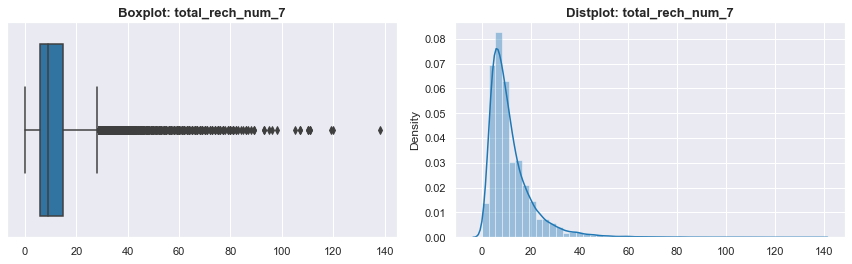

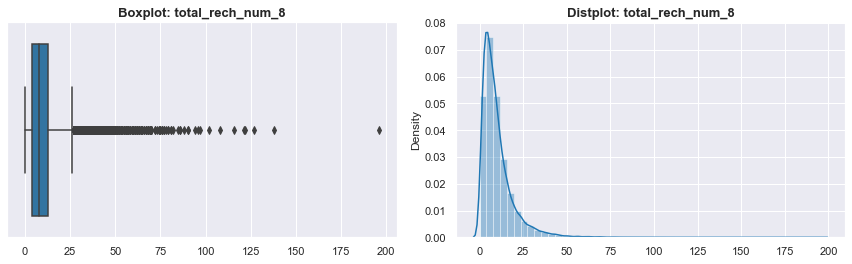

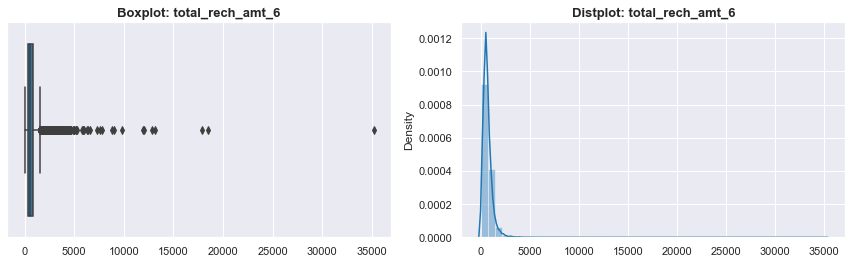

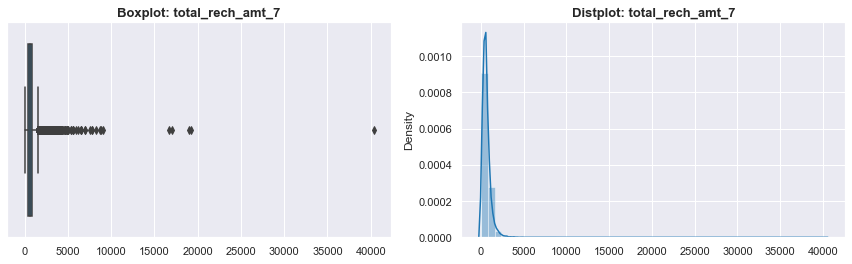

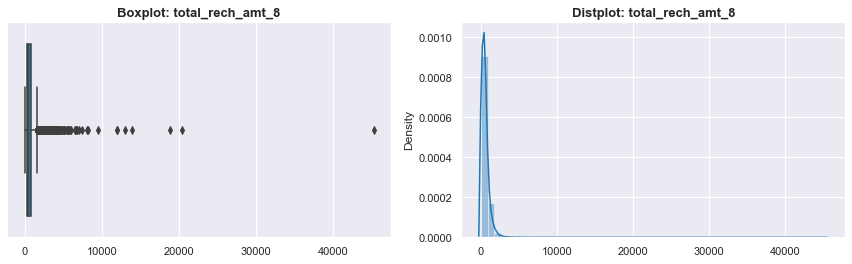

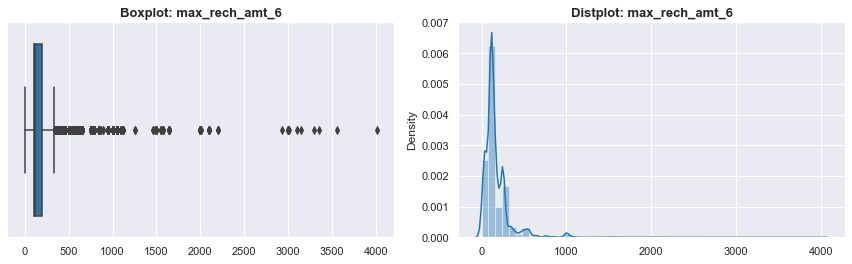

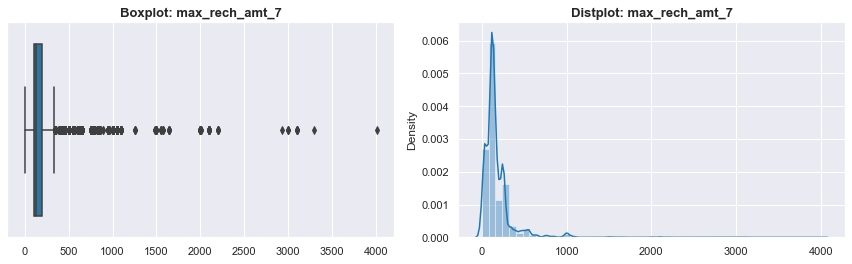

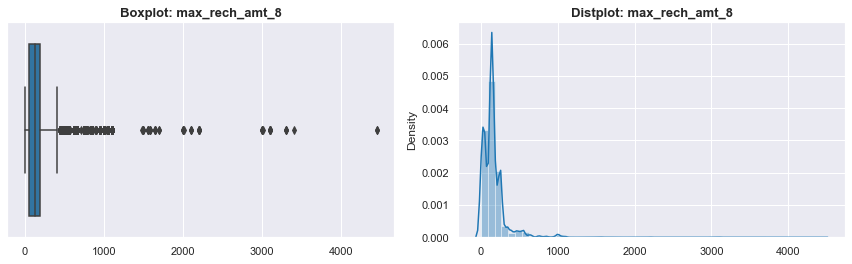

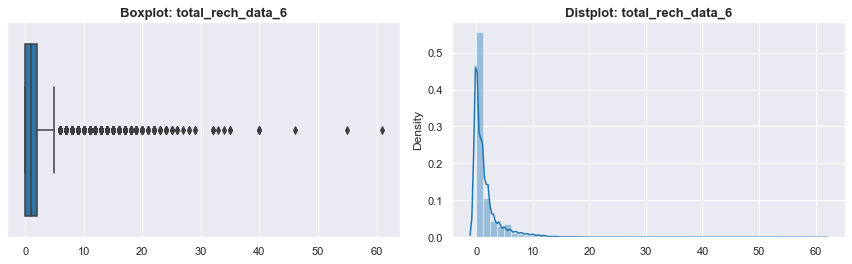

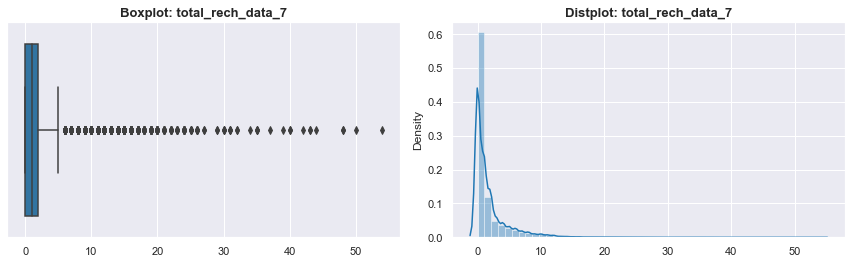

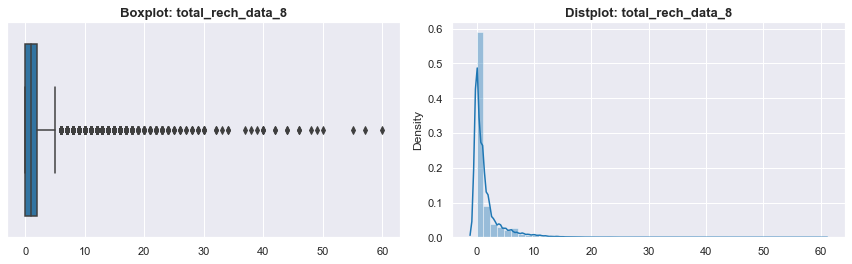

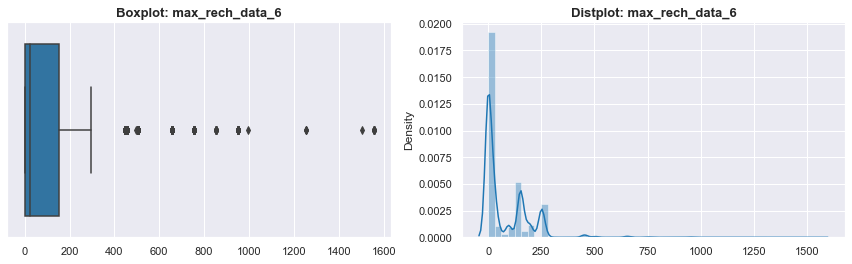

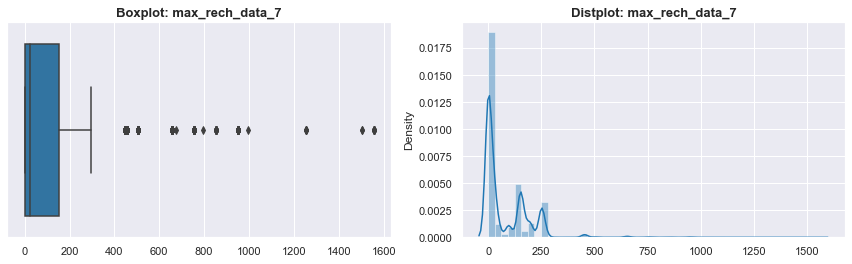

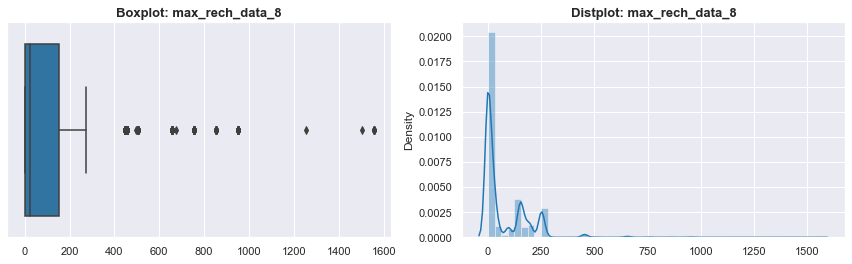

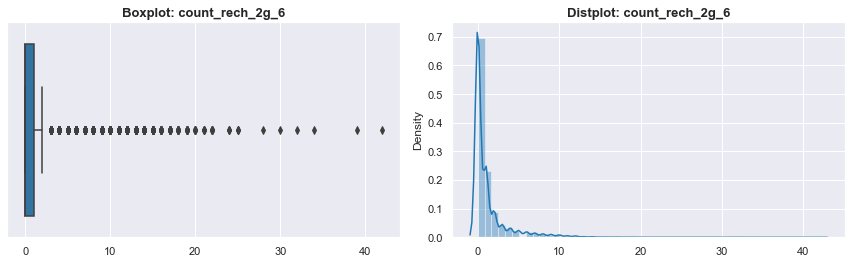

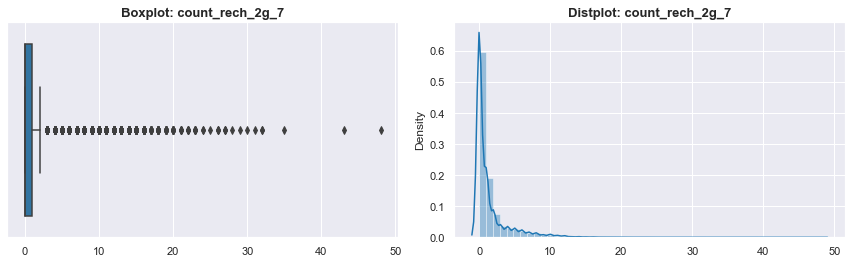

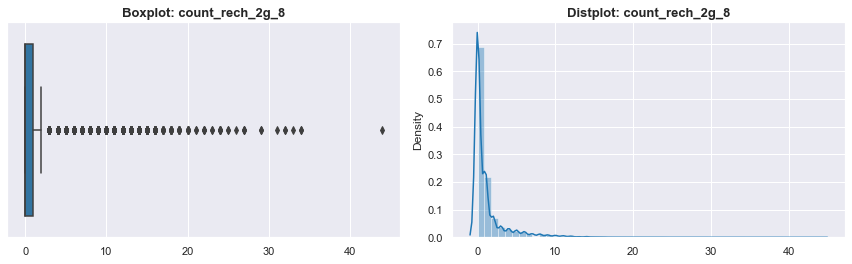

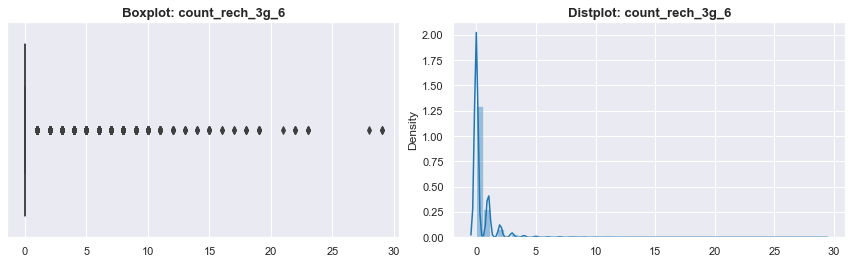

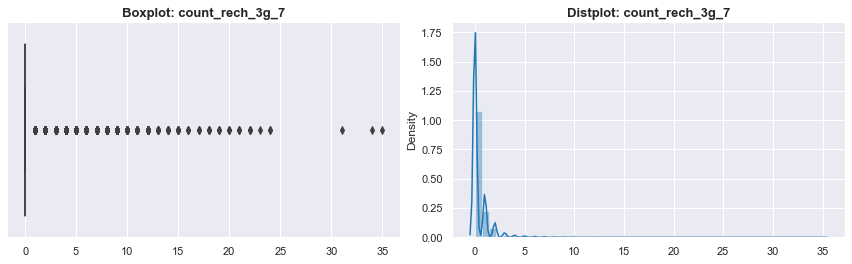

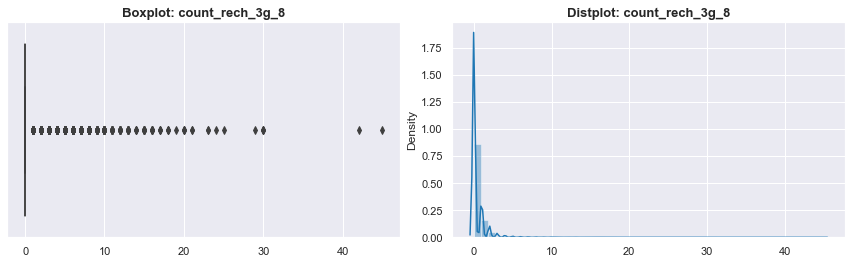

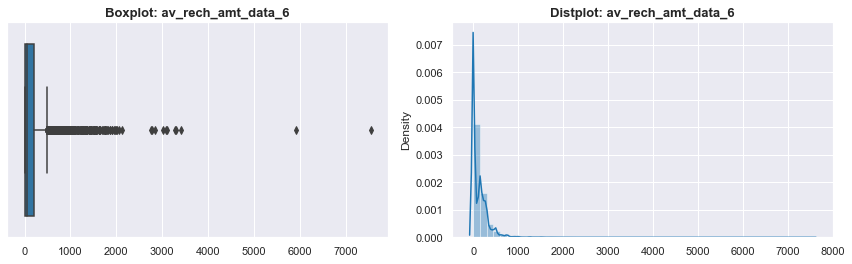

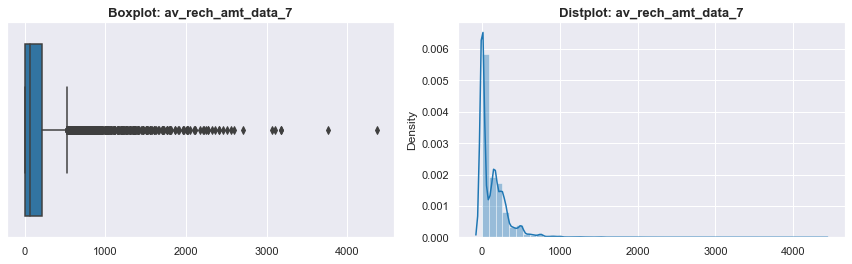

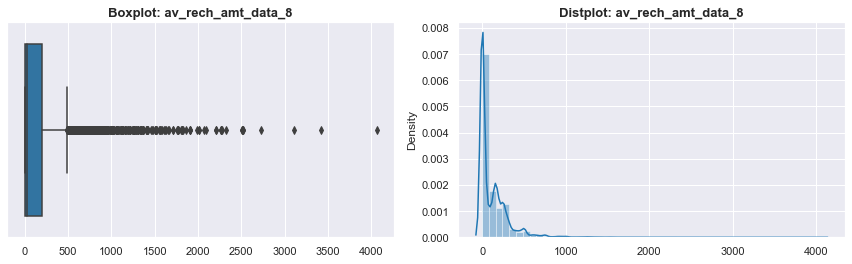

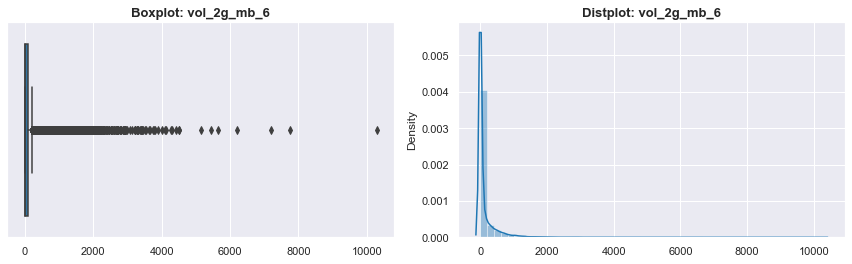

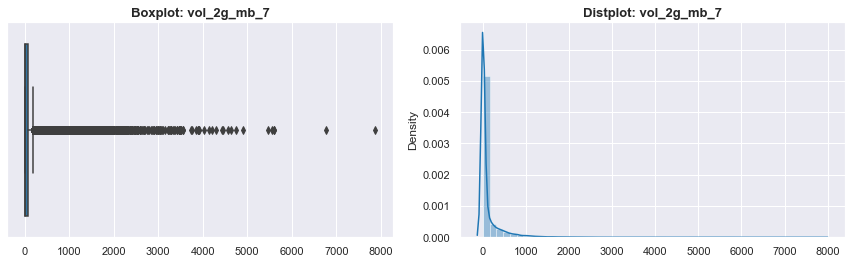

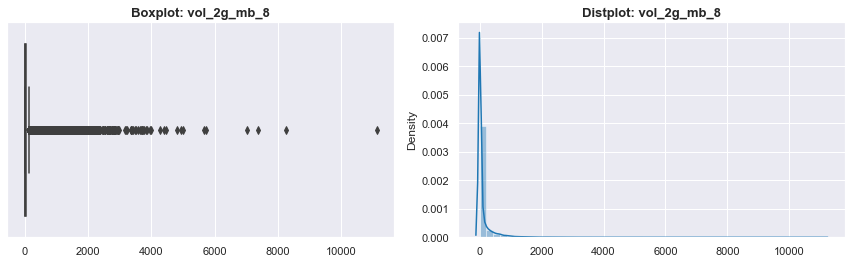

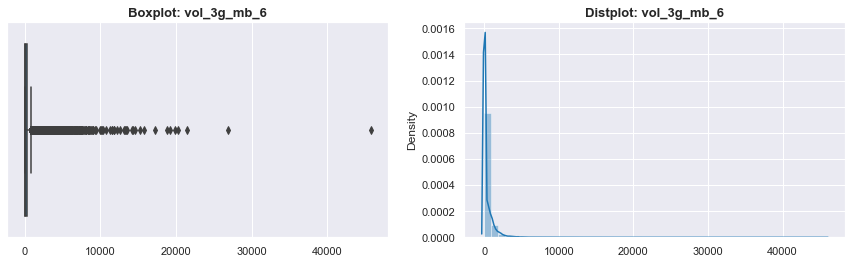

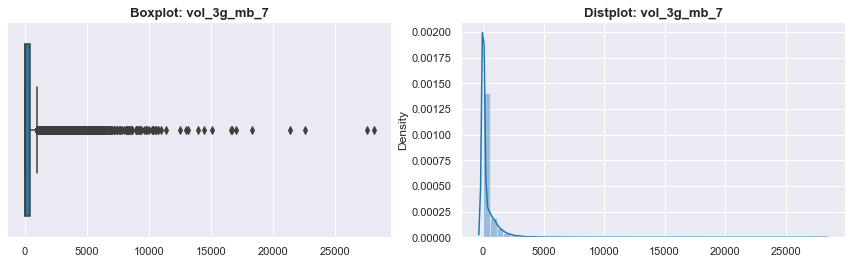

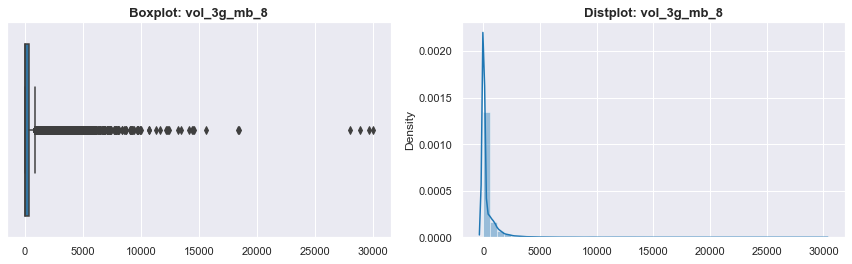

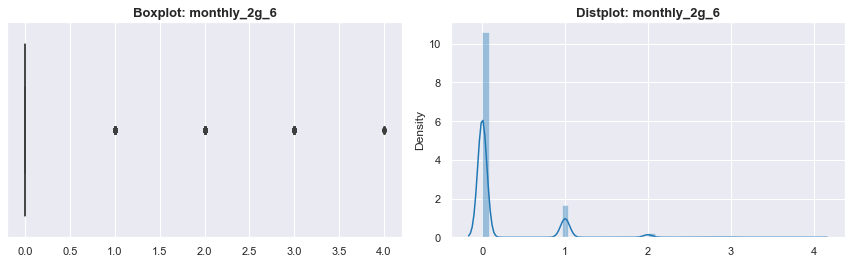

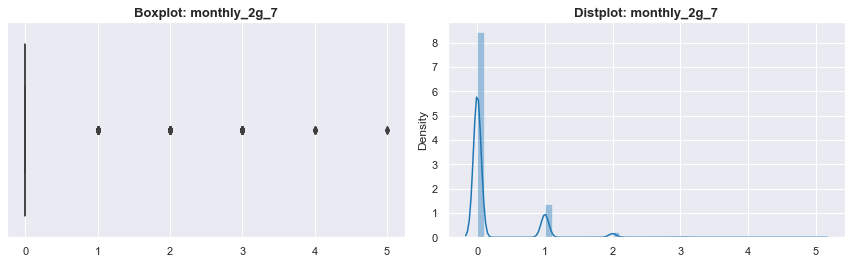

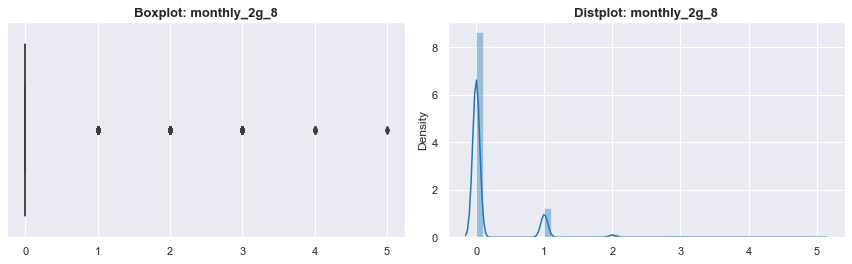

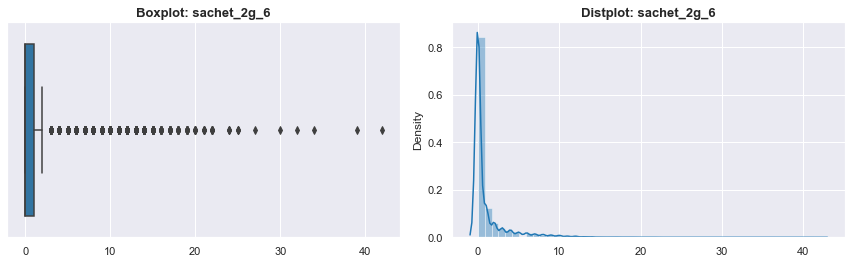

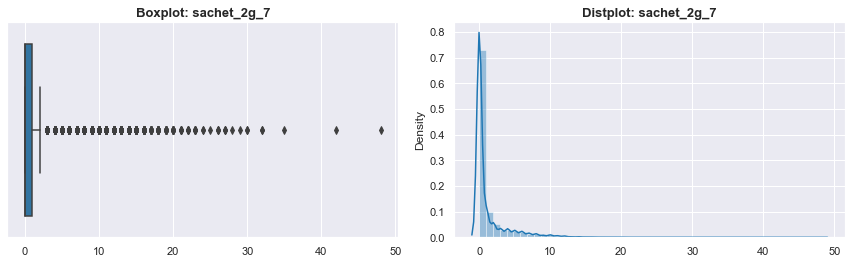

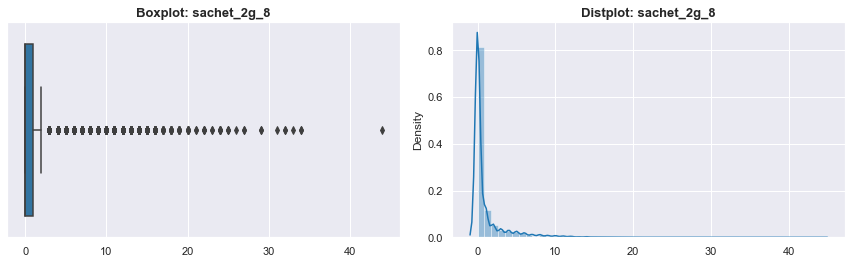

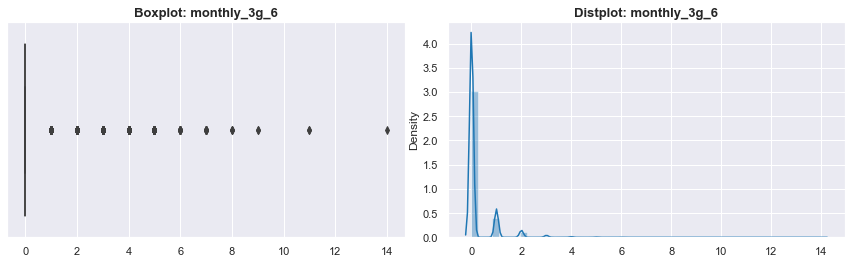

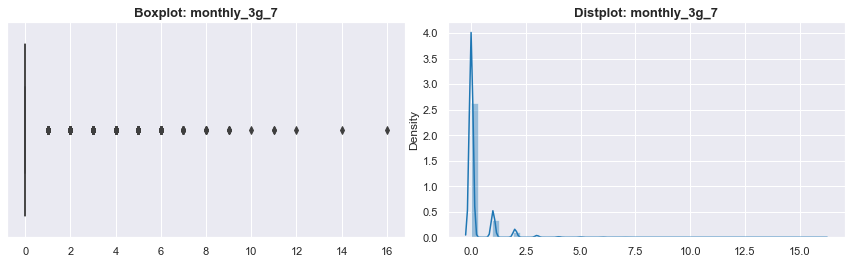

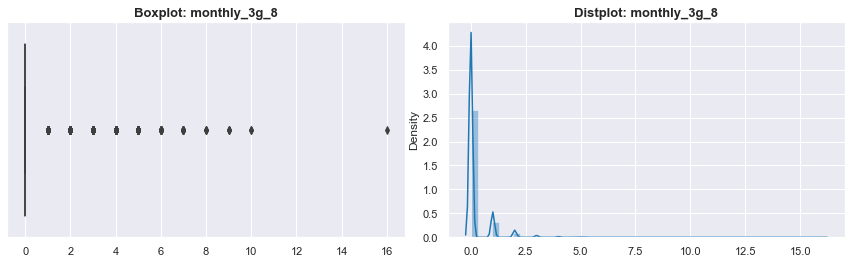

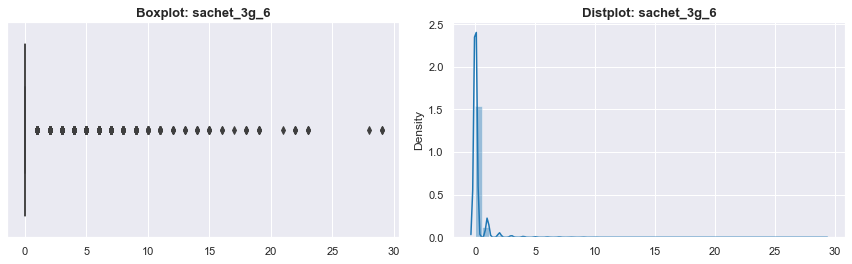

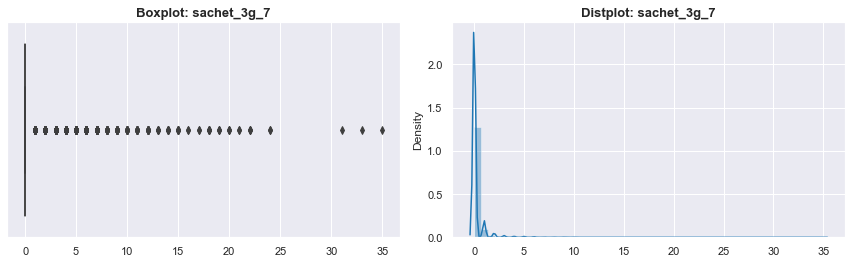

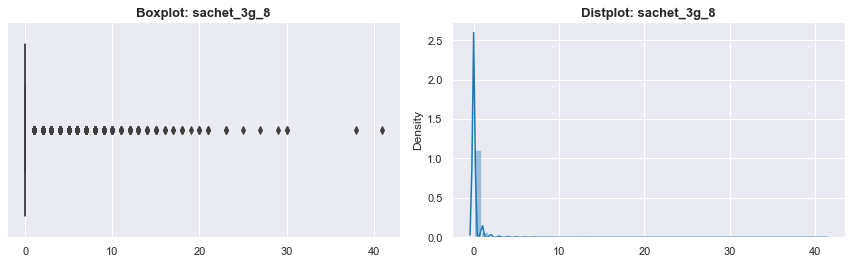

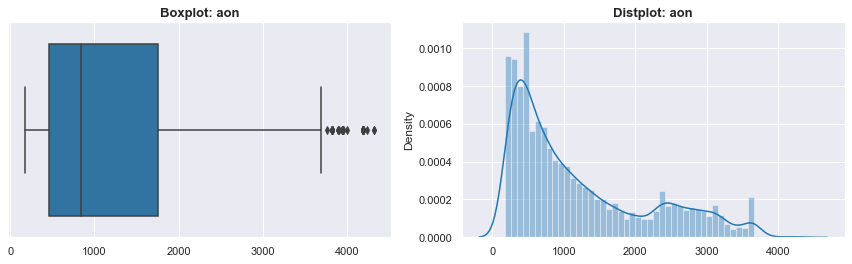

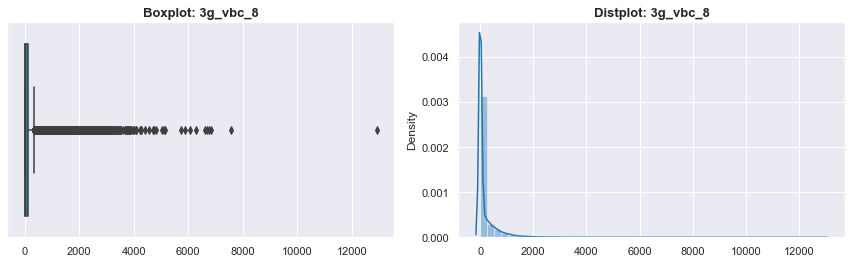

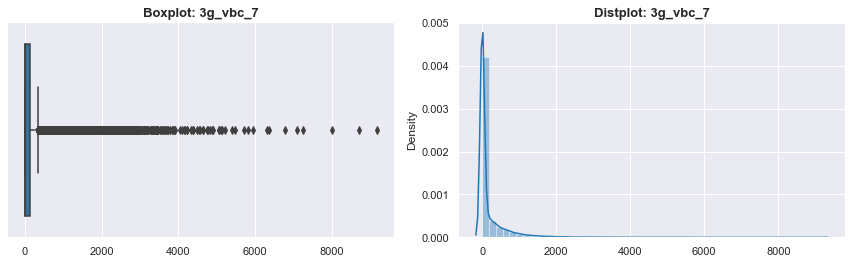

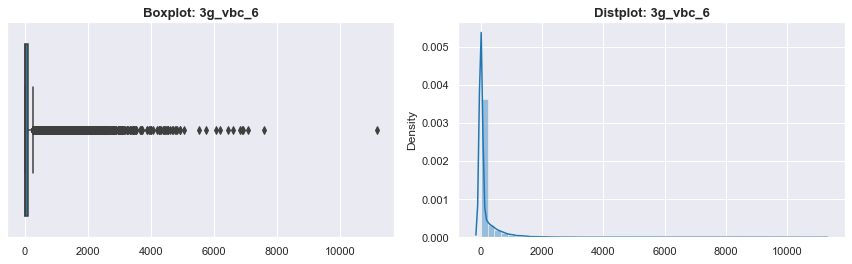

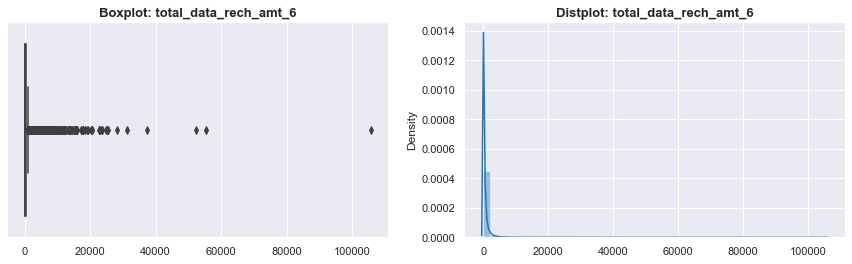

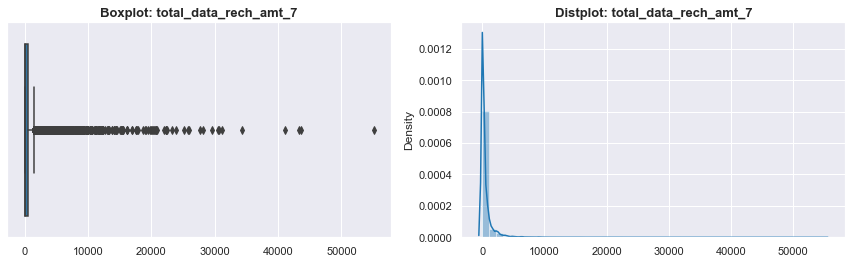

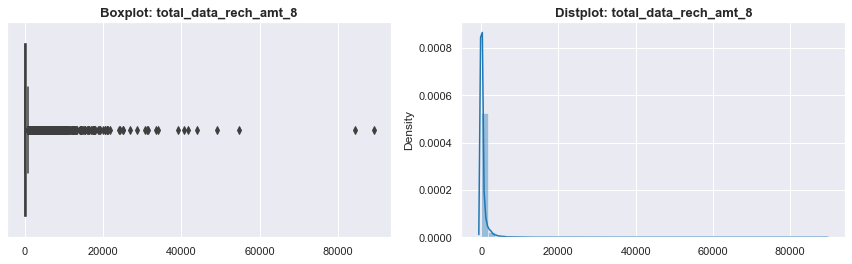

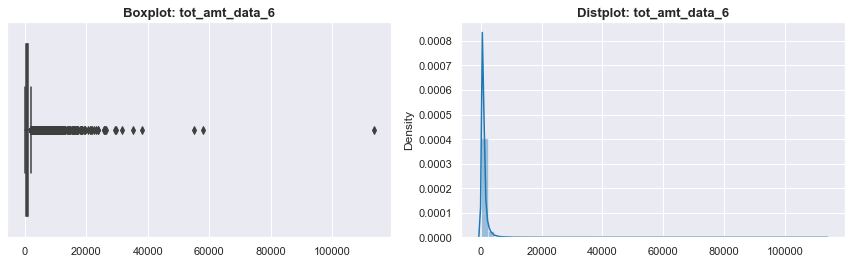

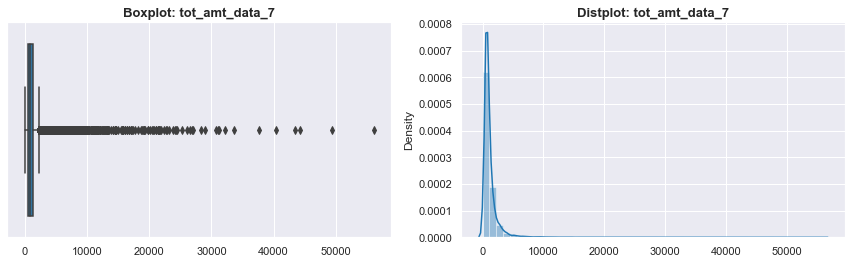

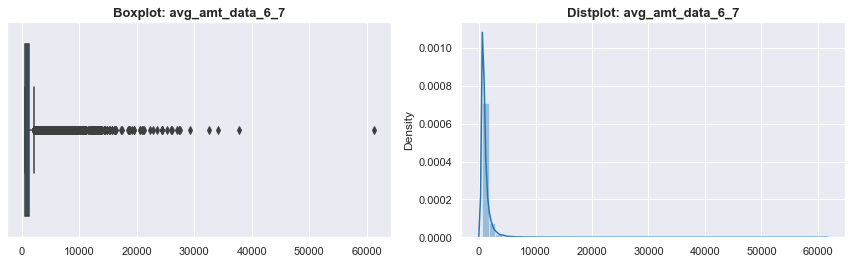

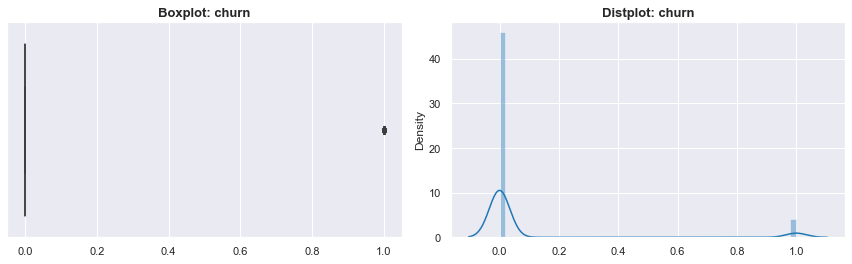

In [52]:
Cotegorical_Col = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

for col in churn_HVC.columns:
    if col not in Cotegorical_Col:
        plt.figure(figsize=(12,7))
        ax1 = plt.subplot(2,2,1)
        sns.boxplot(churn_HVC[col]) 
        plt.title(f"Boxplot: {col}", fontweight = 700,fontsize = 13)
        plt.xlabel("")

        ax2 = plt.subplot(2,2,2)
        sns.distplot(churn_HVC[col], kde=True, bins = 50)
        plt.title(f"Distplot: {col}", fontweight = 700, fontsize = 13)
        plt.xlabel("")
        plt.tight_layout()
        plt.show()

# Outlier Treatment:

In [53]:
# getting list of all numeric columns and removing the churn feature. 

# defining a function to cap outliers: 

def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

Numerical_cols = [col for col in churn_HVC.columns if col not in Cotegorical_Col]
Numerical_cols_adj = [col for col in Numerical_cols if not 'churn' in col]

# cap outliers in the numeric columns
churn_HVC[Numerical_cols_adj] = churn_HVC[Numerical_cols_adj].apply(cap_outliers, axis=0)

In [54]:
# check if the outliers have been fixed to some extent: 

churn_HVC.describe(percentiles=[0.99, 0.98])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8   og_others_6   og_others_7   og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8   ic_others_6   ic_others_7   ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   30001.000000   30001.000000   30001.000000   30001.000000   30001.000000   30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000    30001.000000    30001.000000    30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000    30001.000000    30001.000000    30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000    30001.000000    30001.000000    30001.000000       30001.000000       30001.000000       30001.000000     30001.000000     30001.000000   
mean     548.190437    550.814573    498.441171    244.520332    251.243475    216.618419    358.669154    362.067463    319.430161      12.324453       9.182973       9.218402      20.590115      14.991576      14.900044    241.055646    242.367797    223.979676    329.829118    345.583610    287.333744      1.295685      1.256724      1.087310      5.148315      6.358940      5.771581      0.607632      0.012704      0.016199      593.477978      611.006104      533.001799    220.221370    223.079516    212.700800     40.718255     42.555436     38.246218      277.926328      283.954653      268.064438      0.058812      0.016700      0.020953      7.817988      8.606003      7.705977      0.819634      1.032470      0.855009         11.606818         11.470941          9.738043        648.062189        648.223689        572.185910      162.247357      164.681944      153.829721           1.578785           1.764332           1.522783        75.323064        77.071625   
std      356.617955    361.120770    384.493319    371.616516    387.608598    354.670696    405.252913    413.547205    386.603835      41.750280      35.649995      35.301200      66.900217      52.507665      53.593739    303.277239    300.899122    290.389270    524.488985    548.223773    498.961062     10.699686     10.317350      9.871402     10.600781     12.550877     11.636151      1.697840      0.269649      0.328506      613.798254      633.909173      602.715259    249.910673    250.191627    247.665389     78.564475     82.766840     77.159409      296.692217      300.818719      295.703932      0.136661      0.075829      0.075179     31.468912     33.414192     30.225982      3.914676      4.746921      3.934353          8.098621          8.234645          8.112399        430.636601        441.268660        463.024954      130.747590      134.287275      129.472802           2.353920           2.602330           2.402273        98.306076        99.433675   
min     -823.430558   -878.548639   -945.808000      0.000000

In [55]:
# get a count of arpu datapoints that have negative value

arpu_6_index = (churn_HVC['arpu_6'] < 0)
arpu_7_index = (churn_HVC['arpu_7'] < 0)
arpu_8_index = (churn_HVC['arpu_8'] < 0)
count_neg_arpu = arpu_6_index.sum()+arpu_7_index.sum()+arpu_8_index.sum()
print(f"No. of rows with negative arpu: {count_neg_arpu}")

No. of rows with negative arpu: 179


In [56]:
# delete the observations with negative arpu values. 

churn_HVC = churn_HVC[(churn_HVC['arpu_6'] >= 0) & 
                            (churn_HVC['arpu_7'] >= 0) & 
                            (churn_HVC['arpu_8'] >= 0)]
churn_HVC.shape

(29824, 110)

# Bivariate Analysis:

### Columns related to call & data recharge for good & action phase

In [57]:
rech_call_col = churn_HVC.columns[churn_HVC.columns.str.contains('rech_amt|rech_data')]
rech_call_col

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'total_data_rech_amt_6', 'total_data_rech_amt_7', 'total_data_rech_amt_8'], dtype='object')

In [58]:
# Custom Function for Default Plotting variables

def set_plotting_variable(figure_title, xlabel, ylabel):
    
    plt.title(figure_title)
    plt.xlabel(xlabel, labelpad = 10)
    plt.ylabel(ylabel, labelpad = 10)

In [59]:
def plot_bivariate(y_axis):
    
    plt.figure(figsize = (15, 5))
    
    xlabel = "Churn"
    x_axis = "churn"
    
    title_1 = "Month 6 - " + xlabel
    title_2 = "Month 7 - " + xlabel
    title_3 = "Month 8 - " + xlabel
    
    print("\nChurn vs " + y_axis)

    # Subplot - 1
    plt.subplot(1, 3, 1)

    sns.boxplot(x = x_axis, y = y_axis + "_6", hue = "churn", data = churn_HVC, showfliers = False)
    set_plotting_variable(title_1, xlabel, y_axis + "_6")

    # Subplot - 2
    plt.subplot(1, 3, 2)

    sns.boxplot(x = x_axis, y = y_axis + "_7", hue = "churn", data = churn_HVC, showfliers = False)
    set_plotting_variable(title_2, xlabel, y_axis + "_7")
    
    # Subplot - 3
    plt.subplot(1, 3, 3)

    sns.boxplot(x = x_axis, y = y_axis + "_8", hue = "churn", data = churn_HVC, showfliers = False)
    set_plotting_variable(title_3, xlabel, y_axis + "_8")
    
    plt.subplots_adjust(wspace = 0.4)
    plt.show()


Churn vs arpu


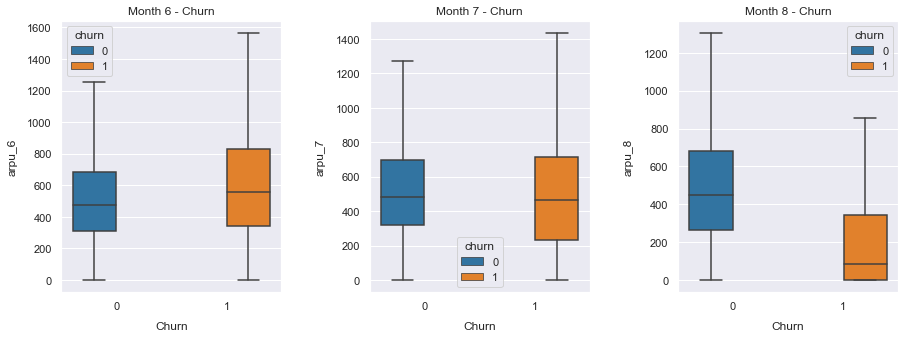


Churn vs onnet_mou


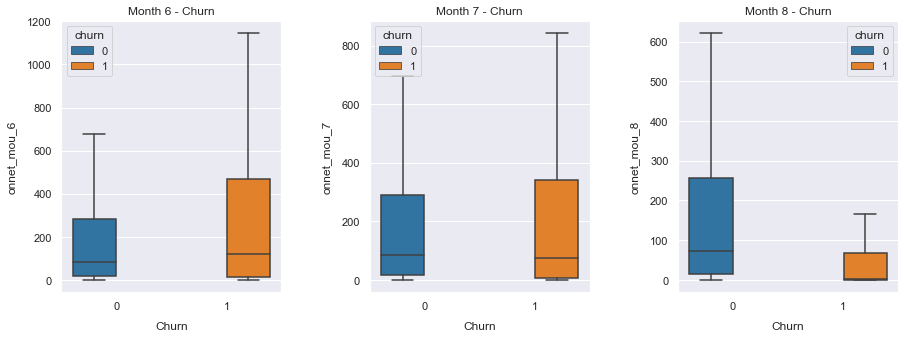


Churn vs offnet_mou


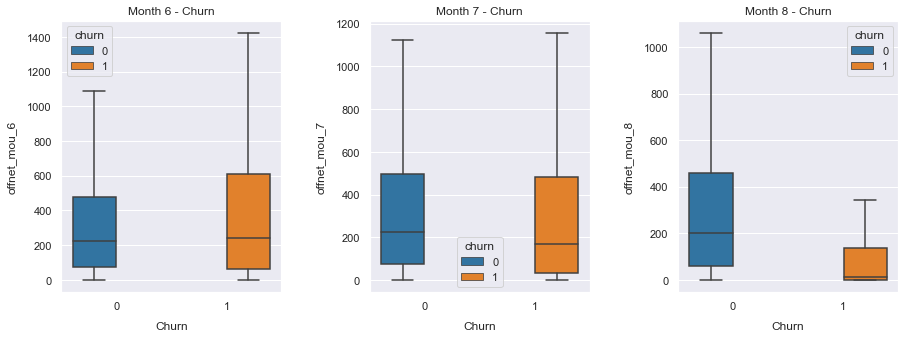


Churn vs total_og_mou


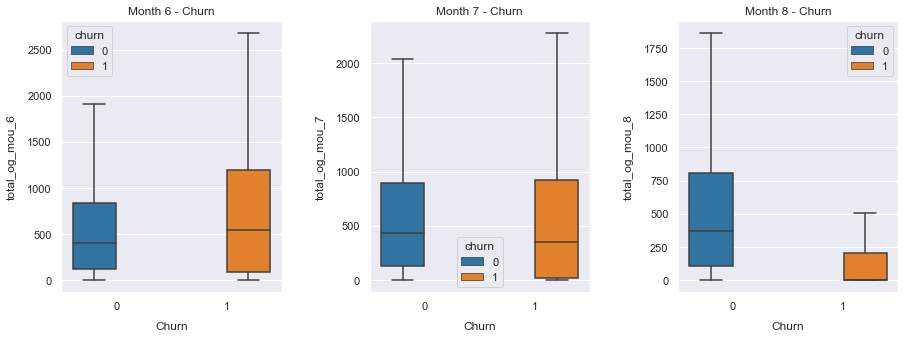


Churn vs total_ic_mou


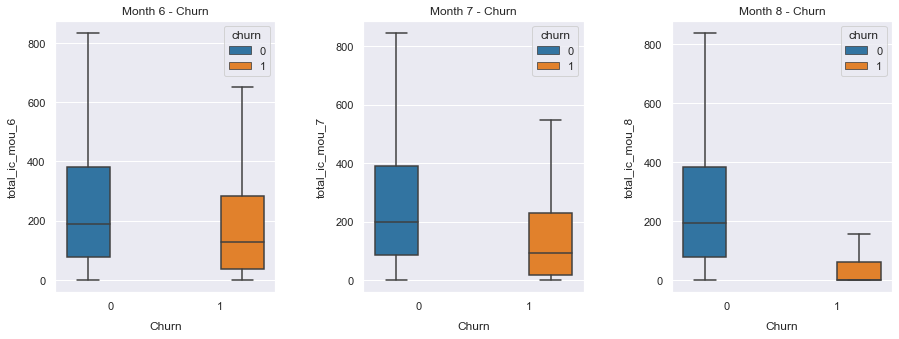


Churn vs total_rech_num


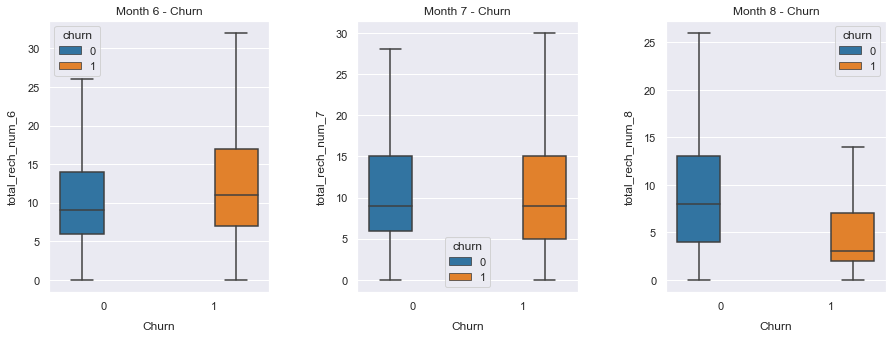


Churn vs total_rech_amt


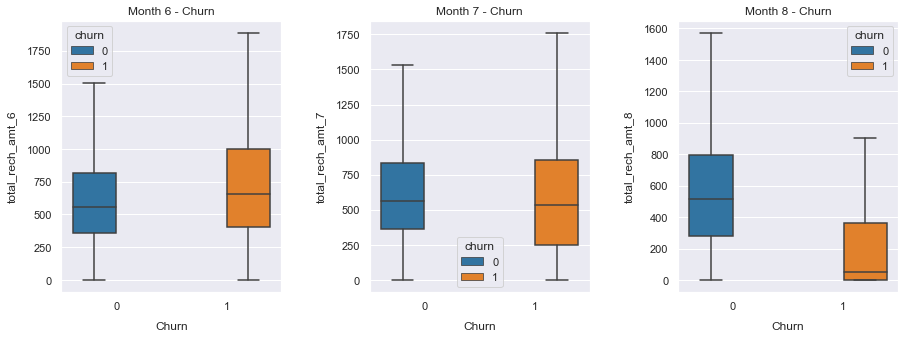


Churn vs vol_2g_mb


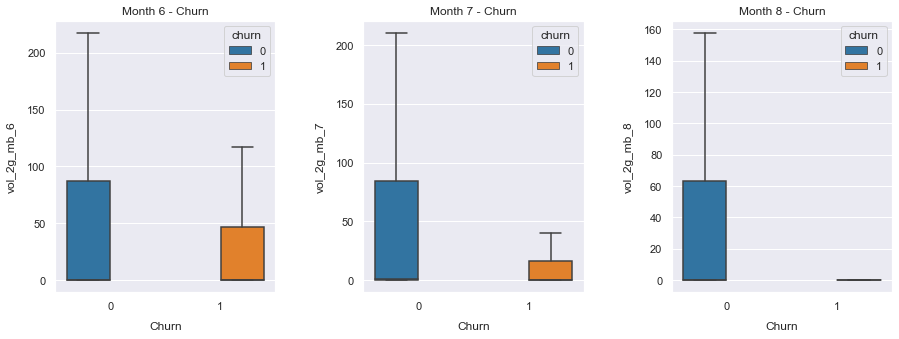


Churn vs vol_3g_mb


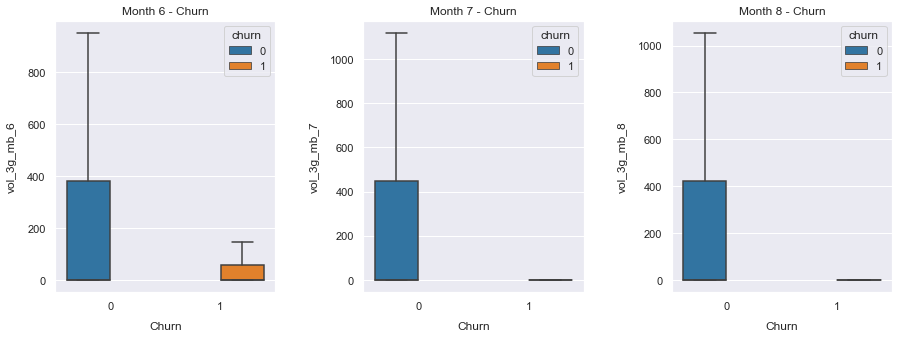

In [60]:
plot_bivariate("arpu")
plot_bivariate("onnet_mou")
plot_bivariate("offnet_mou")
plot_bivariate("total_og_mou")
plot_bivariate("total_ic_mou")
plot_bivariate("total_rech_num")
plot_bivariate("total_rech_amt")
plot_bivariate("vol_2g_mb")
plot_bivariate("vol_3g_mb")

# Multivariate Analysis:

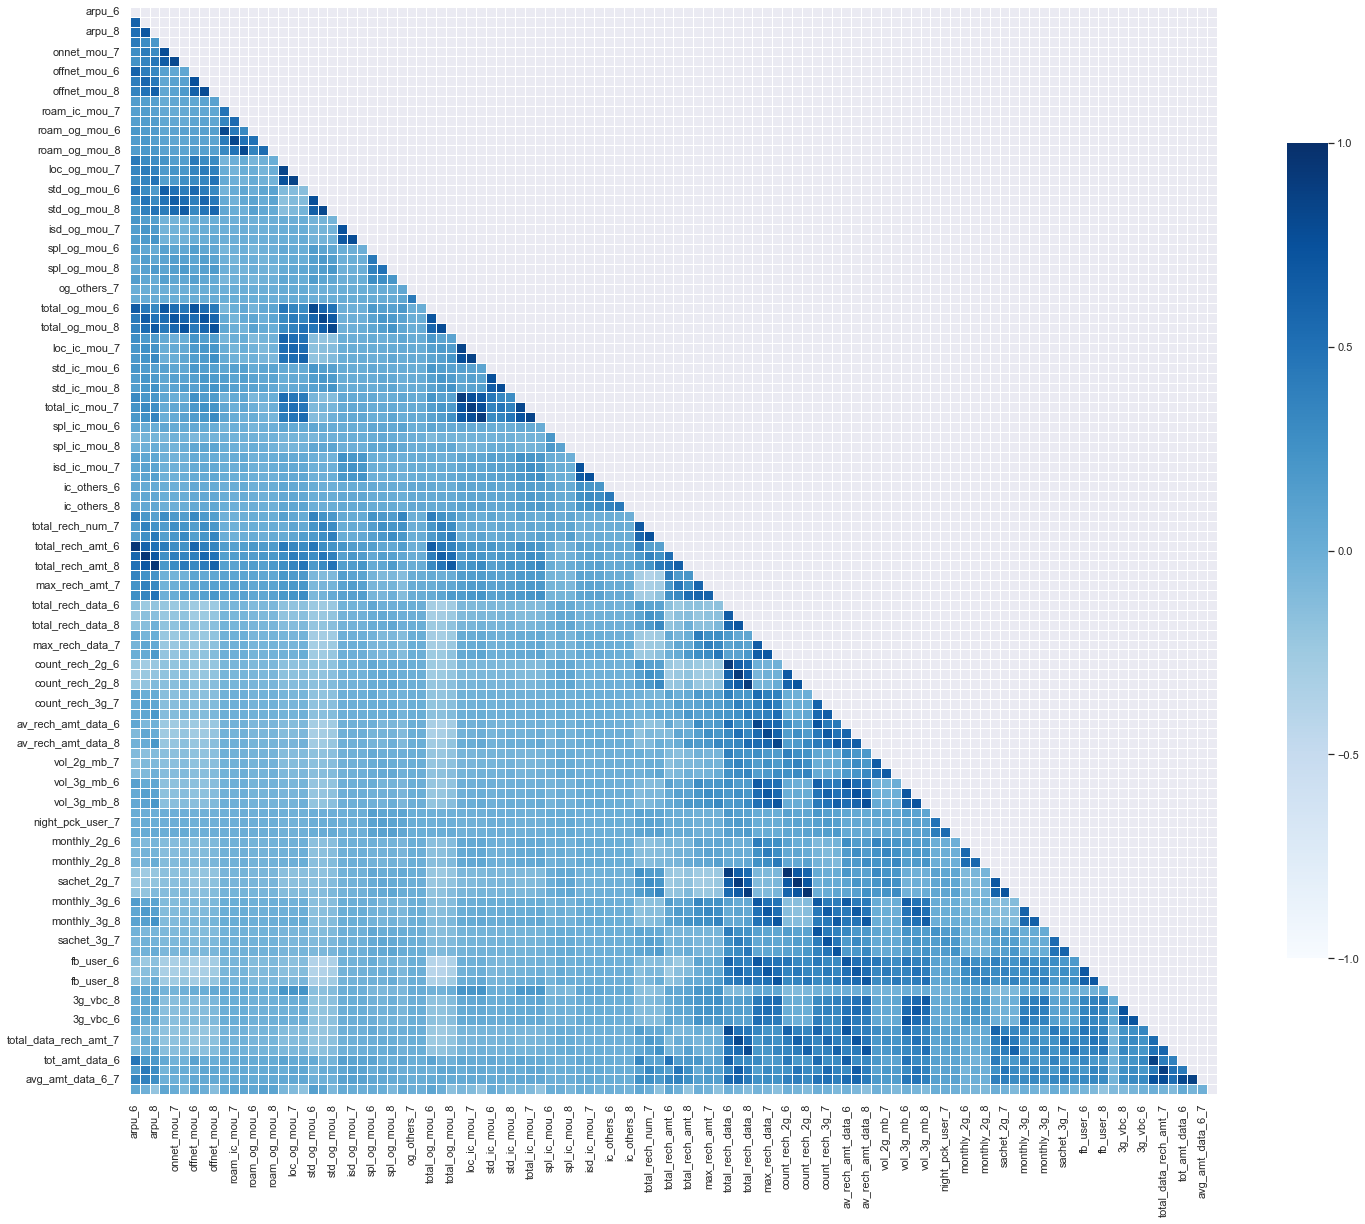

In [61]:
# heatmap to visualize the correlation between variables:

plt.figure(figsize = (25, 20))
correl_0 = churn_HVC.corr()
mask = np.zeros_like(correl_0, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
sns.heatmap(correl_0,
            mask = mask,
            square = True,
            linewidths = .5,
            cmap = 'Blues',
            cbar_kws = {'shrink': 0.75,
                        'ticks' : [-1, -.5, 0, 0.5, 1]},
            vmin = -1, 
            vmax = 1,
            annot = False,
            annot_kws = {"size": 12})
plt.show()

In [62]:
# Define a custom function to pull top n correlations

def top_correl(df):
    correl = df.corr().abs()
    
    # Remove duplicate and identity entries from the matrix
    correl.loc[:,:] = np.tril(correl.values, k=-1)
    correl = correl[correl>0]
    correl = correl.unstack().sort_values(ascending=False).reset_index()
    correl = correl.rename(columns={"level_0": "Column_A",
                           "level_1": "Column_B",
                           0: "Correlation"})
    return correl

In [63]:
# correlation matrix for churn data:

top_correl(churn_HVC[churn_HVC.columns]).head(30)

Column_A            Column_B  Correlation
0         count_rech_2g_7         sachet_2g_7     0.981253
1         count_rech_2g_8         sachet_2g_8     0.981057
2         count_rech_2g_6         sachet_2g_6     0.978290
3                  arpu_8    total_rech_amt_8     0.949993
4                  arpu_6    total_rech_amt_6     0.944162
5                  arpu_7    total_rech_amt_7     0.938046
6       total_rech_data_7     count_rech_2g_7     0.916775
7       total_rech_data_8     count_rech_2g_8     0.916390
8       total_rech_data_6     count_rech_2g_6     0.914802
9            loc_ic_mou_8      total_ic_mou_8     0.909176
10           loc_ic_mou_6      total_ic_mou_6     0.908449
11      total_rech_data_7         sachet_2g_7     0.908080
12      total_rech_data_8         sachet_2g_8     0.907249
13      total_rech_data_6         sachet_2g_6     0.903994
14           loc_ic_mou_7      total_ic_mou_7     0.901988
15  total_data_rech_amt_7      tot_amt_data_7     0.887858
16  total_data_rech_amt_6      tot_amt_data_6     0.867409
17         tot_amt_data_7    avg_amt_data_6_7     0.859475
18           loc_ic_mou_7        loc_ic_mou_8     0.855774
19           loc_og_mou_7        loc_og_mou_8     0.852661
20           loc_ic_mou_6        loc_ic_mou_7     0.841842
21           loc_og_mou_6        loc_og_mou_7     0.837618
22        max_rech_data_6  av_rech_amt_data_6     0.836713
23         total_ic_mou_7      total_ic_mou_8     0.836505
24        max_rech_data_8  av_rech_amt_data_8     0.835352
25           std_og_mou_7      total_og_mou_7     0.834648
26           std_og_mou_8      total_og_mou_8     0.830447
27        max_rech_data_7  av_rech_amt_data_7     0.826678
28          roam_ic_mou_7       roam_og_mou_7     0.824925
29         tot_amt_data_6    avg_amt_data_6_7     0.820253

In [64]:
# creating a diff column for select fields:

churn_HVC['arpu_diff'] = churn_HVC["arpu_8"] - ((churn_HVC["arpu_6"] + churn_HVC["arpu_7"])/2)
churn_HVC['onnet_mou_diff'] = churn_HVC["onnet_mou_8"] - ((churn_HVC["onnet_mou_6"] + churn_HVC["onnet_mou_7"])/2)
churn_HVC['offnet_mou_diff'] = churn_HVC["offnet_mou_8"] - ((churn_HVC["offnet_mou_6"] + churn_HVC["offnet_mou_7"])/2)
churn_HVC['roam_ic_mou_diff'] = churn_HVC["roam_ic_mou_8"] - ((churn_HVC["roam_ic_mou_6"] + churn_HVC["roam_ic_mou_7"])/2)
churn_HVC['roam_og_mou_diff'] = churn_HVC["roam_og_mou_8"] - ((churn_HVC["roam_og_mou_6"] + churn_HVC["roam_og_mou_7"])/2)
churn_HVC['loc_og_mou_diff'] = churn_HVC["loc_og_mou_8"] - ((churn_HVC["loc_og_mou_6"] + churn_HVC["loc_og_mou_7"])/2)
churn_HVC['std_og_mou_diff'] = churn_HVC["std_og_mou_8"] - ((churn_HVC["std_og_mou_6"] + churn_HVC["std_og_mou_7"])/2)
churn_HVC['isd_og_mou_diff'] = churn_HVC["isd_og_mou_8"] - ((churn_HVC["isd_og_mou_6"] + churn_HVC["isd_og_mou_7"])/2)
churn_HVC['spl_og_mou_diff'] = churn_HVC["spl_og_mou_8"] - ((churn_HVC["spl_og_mou_6"] + churn_HVC["spl_og_mou_7"])/2)
churn_HVC['total_og_mou_diff'] = churn_HVC["total_og_mou_8"] - ((churn_HVC["total_og_mou_6"] + churn_HVC["total_og_mou_7"])/2)
churn_HVC['loc_ic_mou_diff'] = churn_HVC["loc_ic_mou_8"] - ((churn_HVC["loc_ic_mou_6"] + churn_HVC["loc_ic_mou_7"])/2)
churn_HVC['std_ic_mou_diff'] = churn_HVC["std_ic_mou_8"] - ((churn_HVC["std_ic_mou_6"] + churn_HVC["std_ic_mou_7"])/2)
churn_HVC['isd_ic_mou_diff'] = churn_HVC["isd_ic_mou_8"] - ((churn_HVC["isd_ic_mou_6"] + churn_HVC["isd_ic_mou_7"])/2)
churn_HVC['spl_ic_mou_diff'] = churn_HVC["spl_ic_mou_8"] - ((churn_HVC["spl_ic_mou_6"] + churn_HVC["spl_ic_mou_7"])/2)
churn_HVC['total_ic_mou_diff'] = churn_HVC["total_ic_mou_8"] - ((churn_HVC["total_ic_mou_6"] + churn_HVC["total_ic_mou_7"])/2)
churn_HVC['total_rech_num_diff'] = churn_HVC["total_rech_num_8"] - ((churn_HVC["total_rech_num_6"] + churn_HVC["total_rech_num_7"])/2)
churn_HVC['total_rech_amt_diff'] = churn_HVC["total_rech_amt_8"] - ((churn_HVC["total_rech_amt_6"] + churn_HVC["total_rech_amt_7"])/2)
churn_HVC['max_rech_amt_diff'] = churn_HVC["max_rech_amt_8"] - ((churn_HVC["max_rech_amt_6"] + churn_HVC["max_rech_amt_7"])/2)
churn_HVC['max_rech_data_diff'] = churn_HVC["max_rech_data_8"] - ((churn_HVC["max_rech_data_6"] + churn_HVC["max_rech_data_7"])/2)
churn_HVC['av_rech_amt_data_diff'] = churn_HVC["av_rech_amt_data_8"] - ((churn_HVC["av_rech_amt_data_6"] + churn_HVC["av_rech_amt_data_7"])/2)
churn_HVC['vol_2g_mb_diff'] = churn_HVC["vol_2g_mb_8"] - ((churn_HVC["vol_2g_mb_6"] + churn_HVC["vol_2g_mb_7"])/2)
churn_HVC['vol_3g_mb_diff'] = churn_HVC["vol_3g_mb_8"] - ((churn_HVC["vol_3g_mb_6"] + churn_HVC["vol_3g_mb_7"])/2)

In [65]:
churn_HVC.shape

(29824, 132)

# Test Train Split:

In [66]:
# Import library
from sklearn.model_selection import train_test_split

In [67]:
# Putting feature variable to X
X = churn_HVC.drop(['churn'], axis=1)
X.head()

arpu_6    arpu_7       arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  \
0   197.385   214.816   213.803000         0.00         0.00         0.00          0.00          0.00          0.00           0.00           0.00           0.00           0.00           0.00           0.00          0.00          0.00          0.00          0.00          0.00          0.00           0.0          0.00          0.00           0.0           0.0          0.00          0.0          0.0          0.0            0.00            0.00            0.00          0.00          0.00          5.44          0.00          0.00          0.00            0.00            0.00            5.44          0.00           0.0           0.0          0.00          0.00          0.00         0.00         0.00         0.00               4.0               3.0               2.0             362.0             252.0        252.000000      252.000000      252.000000       252.00000                1.0                1.0                1.0            252.0            252.0            252.0              0.0   
1  1069.180  1349.850  2014.483901        57.84        54.68        52.29        453.43        567.16        325.91          16.23          33.49          31.64          23.74          12.59          38.06        422.16        533.91        255.79         60.86         75.14         77.84           0.0          0.18         10.01           4.5           0.0          6.50          0.0          0.0          0.0          487.53          609.24          350.16        427.88        355.23        188.04        180.54        173.08        193.94          626.46          558.04          428.74          0.21           0.0           0.0          2.06         14.53         31.59        15.74        15.19        15.14               5.0               5.0               7.0            1580.0             790.0       2418.103175      695.232696      716.373953       679.76786                0.0                0.0                0.0              0.0              0.0              0.0              0.0   
2   378.721   492.223   137.362000       413.69       351.03        35.08         94.66         80.63        136.48           0.00           0.00           0.00           0.00           0.00           0.00        378.09        288.18         63.04        130.26        143.48         98.28           0.0          0.00          0.00           0.0           0.0         10.23          0.0          0.0          0.0          508.36          431.66          171.56         81.43         23.83         15.79         22.43          4.66          0.75          103.86           28.49           16.54          0.00           0.0           0.0          0.00          0.00          0.00         0.00         0.00         0.00              19.0              21.0              14.0             437.0             601.0        120.000000       90.000000      154.000000        30.00000                0.0                2.0                3.0              0.0            154.0             23.0              0.0   
3   5

In [68]:
y = churn_HVC['churn']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

In [69]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

print(X_train.shape, X_test.shape)

(20876, 131) (8948, 131)


## Handling Data Imbalancing:
### Synthetic Minority Over-sampling Technique (SMOTE):
#### Given the class imbalance in our target variable churn, we will use SMOTE to resolve the issue of overfitting. SMOTE mitigates the problem of overfitting caused by random oversampling as synthetic examples are generated rather than replication of instances. Also, there is no loss of useful information as would have been the case with random undersampling.

In [70]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

In [71]:
# Checking the break-up of y_train data before SMOTE:

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))
print("Before OverSampling, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before OverSampling, counts of label '1': 1680
Before OverSampling, counts of label '0': 19196
Before OverSampling, churn event rate : 8.05% 



### From the above Result, We can see churn event rate only 8.5%

In [72]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)

In [73]:
# Fittign SMOTE to the train set

X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [74]:
# Checking the break-up of y_train data after SMOTE:

print('After OverSampling, the shape of train_X: {}'.format(X_train_sm.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_sm.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train_sm==1)/len(y_train_sm)*100,2)))

After OverSampling, the shape of train_X: (38392, 131)
After OverSampling, the shape of train_y: (38392,) 

After OverSampling, counts of label '1': 19196
After OverSampling, counts of label '0': 19196
After OverSampling, churn event rate : 50.0% 



### Using SMOTE, we have synthetically oversampled the churn class and now both churn and non-churn class are equally distributed.

# Feature Scaling

In [75]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [76]:
from sklearn.preprocessing import MinMaxScaler

# create a fresh list of num_cols 
num_cols = X_train.select_dtypes(include=['float64']).columns

# initializing MinMaxScaler
scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  \
2234   0.202379  0.345158  0.198178     0.487264     0.765581     0.378208      0.045534      0.084608      0.064623       0.000000            0.0        0.00000       0.000000            0.0       0.000000      0.065647      0.159392      0.099054      0.363877      0.542599      0.276549           0.0           0.0      0.000000      0.000000      0.095759      0.074230     0.000000          0.0          0.0        0.328766        0.527366        0.273863      0.189398      0.218711      0.173958      0.003288      0.186696      0.082002        0.172150        0.247342        0.174220      0.000000           0.0           0.0      0.060214      0.000000      0.000000     0.000000     0.000000          0.0          0.199310          0.399839          0.291036          0.186020          0.335162          0.188578        0.158220        0.153551        0.191242           0.000000           0.000000           0.000000         0.000000         0.000000         0.000000         0.000000   
13773  0.039607  0.060928  0.071669     0.000701     0.001382     0.005959      0.002449      0.000832      0.000455       0.000000            0.0        0.00132       0.000000            0.0       0.013113      0.004039      0.001129      0.000309      0.000000      0.001034      0.002249           0.0           0.0      0.000000      0.022044      0.008969      0.045635     0.000000          0.0          0.0        0.002576        0.001647        0.003125      0.000706      0.003197      0.000984      0.000000      0.000000      0.008636        0.000599        0.002666        0.003748      0.000000           0.0           0.0      0.000000      0.000000      0.000000     0.000000     0.000000          0.0          0.174397          0.249899          0.343952          0.040105          0.059806          0.070717        0.035959        0.057233        0.044133           0.492058           0.359411           0.565507         0.060057         0.097004         0.071747         0.571621   
21641  0.556865  0.625673  0.457252     0.904029     1.000000     0.877861      0.100858      0.121550      0.114093       0.000000            0.0        0.00000       0.000000            0.0       0.000000      0.142114      0.181797      0.206503      0.675854      0.738045      0.628920           0.0           0.0      0.000000      0.025291      0.124321      0.147127     0.407394          0.0          0.0        0.623615        0.699775        0.612880      0.232525      0.224318      0.288762      0.082278      0.043543      0.095347        0.224742        0.202193        0.275412      0.719759           0.0           0.0      0.000000      0.000000      0.000000     0.000000     0.000000          0.0          0.448448          0.399839          0.264578          0.547821          0.608026          0.455729        0.172604        0.178678        0.211837           0.000000           0.000000           0.000000         0.000000         0.000000         0.000000         0.000000   
15592

# Model with PCA

In [ ]:
#Import PCA
from sklearn.decomposition import PCA

In [79]:
# Instantiate PCA
pca = PCA(random_state=42)

In [80]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [81]:
# Principal components
pca.components_

array([[-4.79231065e-02, -4.53025317e-02, -3.08216309e-02, ...,
        -3.88866393e-03, -5.48218563e-03,  7.38909346e-04],
       [ 1.40582824e-01,  1.50972198e-01,  1.66270585e-01, ...,
         8.62344908e-03,  9.32332898e-03,  5.72509358e-03],
       [ 9.38524290e-02,  1.24203358e-01,  1.43024263e-01, ...,
         2.54826325e-02,  9.97486093e-03,  1.32054910e-02],
       ...,
       [ 0.00000000e+00, -1.16226473e-16,  1.84249160e-16, ...,
         2.74711724e-01, -5.80276913e-02,  1.64360088e-01],
       [-0.00000000e+00, -2.15105711e-16,  4.85524214e-16, ...,
         1.28182987e-01, -2.23184761e-03,  1.25034778e-02],
       [ 0.00000000e+00, -8.67361738e-17, -5.77735289e-17, ...,
        -1.95176656e-02,  7.60198732e-03,  1.05587278e-02]])

In [82]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.23992124 0.34315197 0.42219485 0.48080699 0.52508573 0.56194796
 0.588209   0.61231614 0.63528355 0.65604645 0.67601055 0.69541924
 0.71335175 0.72856238 0.74303317 0.75556749 0.76711839 0.77817544
 0.78885775 0.79937123 0.80952306 0.81906532 0.82848173 0.83745305
 0.84615782 0.85454746 0.86283324 0.87073308 0.87819862 0.88438265
 0.88985566 0.89503203 0.89973937 0.90435353 0.90890671 0.91329002
 0.91738428 0.9212346  0.92466905 0.92803041 0.93132189 0.93452591
 0.93770593 0.94068578 0.94361271 0.94641772 0.94915592 0.95181235
 0.9544422  0.95699605 0.95938867 0.96161832 0.96380906 0.96596948
 0.9679811  0.96978463 0.97154041 0.97307074 0.97455438 0.97602046
 0.97745647 0.97878234 0.98004408 0.98124556 0.98244443 0.98354679
 0.98462573 0.98567011 0.98667479 0.9876324  0.98856241 0.98947516
 0.99033152 0.99116474 0.99194221 0.99270696 0.99335503 0.99398944
 0.99459056 0.99502758 0.99545327 0.99584386 0.99620318 0.99655811
 0.99689395 0.99720639 0.99750964 0.99780491 0.99806803 0.9982

Text(0, 0.5, 'Cumulative Variance')

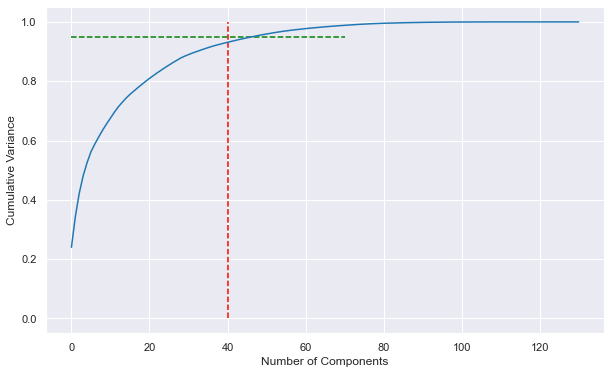

In [83]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.vlines(x=40, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=70, xmin=0, colors="g", linestyles="--")
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

### From above Resulr, We can see that 40 components explain amost more than 90% variance of the data. So, we will perform PCA with 60 components.

## Performing PCA with 40 components

In [84]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [85]:
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=40)

In [86]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

## Applying transformation on the test set
### We are only doing Transform in the test set not the Fit-Transform. Because the Fitting is already done on the train set. So, we just have to do the transformation with the already fitted data on the train set.

In [87]:
X_test_pca = pca_final.transform(X_test)

# Emphasize Sensitivity/Recall than Accuracy

### 1. We are more focused on higher Sensitivity/Recall score than the accuracy.
### 2. The main goal is to reatin the customers, who have the possiblity to churn. There should not be a problem, if we consider few not churn customers as churn customers and provide them some incentives for retaining them. Hence, the sensitivity score is more important here.

# Logistic Regression with PCA

In [88]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [89]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Tuning Hyperparameter C
### C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [90]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [91]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {
    'penalty': ['l1', 'l2'],
    "C": [0.01, 0.1, 1, 10, 100, 1000]
}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 



In [92]:
# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='recall', verbose=1)

In [93]:
# Results of Grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C param_penalty                        params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0        0.006199      0.000750         0.000000        0.000000    0.01            l1  {'C': 0.01, 'penalty': 'l1'}                NaN                NaN                NaN                NaN                NaN              NaN             NaN                7                 NaN                 NaN                 NaN                 NaN                 NaN               NaN              NaN
1        0.088952      0.002277         0.006393        0.000492    0.01            l2  {'C': 0.01, 'penalty': 'l2'}           0.039755           0.044776           0.023599           0.035928           0.031884         0.035188        0.007191                6            0.032520            0.030483            0.041014            0.034918            0.032210          0.034229         0.003675
2        0.007196      0.000748         0.000000        0.000000     0.1            l1   {'C': 0.1, 'penalty': 'l1'}                NaN                NaN                NaN                NaN                NaN              NaN             NaN                8                 NaN                 NaN                 NaN                 NaN                 NaN               NaN              NaN
3        0.153911      0.009461         0.006994        0.000893     0.1            l2   {'C': 0.1, 'penalty': 'l2'}           0.177370           0.170149           0.168142           0.173653           0.162319         0.170326        0.005091                5            0.180340            0.188104            0.190157            0.181278            0.176030          0.183182         0.005210
4        0.008995      0.004515         0.000000        0.000000       1            l1     {'C': 1, 'penalty': 'l1'}                NaN                NaN                NaN                NaN                NaN              NaN             NaN                9                 NaN                 NaN                 NaN                 NaN                 NaN               NaN              NaN
5        0.210081      0.022180         0.006395        0.001854       1            l2     {'C': 1, 'penalty': 'l2'}           0.211009           0.220896           0.227139           0.281437           0.234783         0.235053        0.024465                4            0.238729            0.246097            0.247576            0.235513            0.235955          0.240774         0.005093
6        0.012194      0.002560         0.000000        0.000000      10            l1    {'C': 10, 'penalty': 'l1'}                NaN                NaN                NaN                NaN                NaN              NaN             NaN               10                 NaN                 NaN                 NaN                 NaN                 NaN               NaN              NaN
7        0.278642      0.053312         0.008795        0.002636      10            l2    {'C': 10, 'penalty': 'l2'}           0.217125           0.229851           0.241888           0.290419           0.237681         0.243393        0.024979                3            0.248337            0.255019            0.256525            0.241456            0.242697          0.248807         0.006160
8        0.006596      0.000799         0.000000        0.000000     100            l1   {'C': 100, 'penalty': 'l1'}                NaN                NaN                NaN                NaN                NaN              NaN             NaN               11                 NaN                 NaN                 NaN                 NaN                 NaN               NaN              NaN
9        0.219479      0.019508   

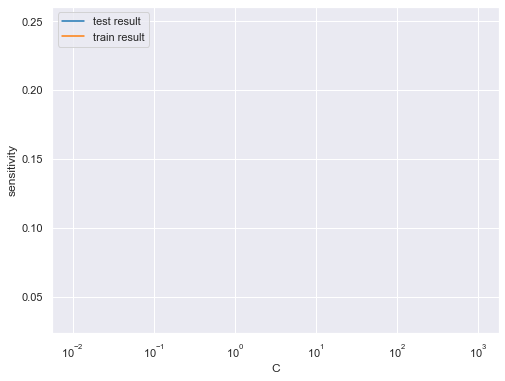

In [94]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [95]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.24396553676769134 at C = 100


# Logistic Regression with Optimal C

In [96]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [97]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

### Prediction on the train set

In [98]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [99]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[18972   224]
 [ 1265   415]]


In [100]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [101]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9286740754933895
Sensitivity:- 0.24702380952380953
Specificity:- 0.9883309022713065


### Prediction on the test set

In [102]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [103]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6724 1540]
 [ 159  525]]


In [104]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [105]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8101251676352258
Sensitivity:- 0.7675438596491229
Specificity:- 0.813649564375605


## *Model summary*

### Train set
####     Accuracy = 0.92
####    Sensitivity = 0.24
####    Specificity = 0.88

###  Test set
####     Accuracy = 0.81
####     Sensitivity = 0.76
####     Specificity = 0.81
####  Overall, the model is performing well in the test set, what it had learnt from the train set.

# Random Forest with PCA

In [204]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

### Hyperparameter tuning

In [ ]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [ ]:
GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=1)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

#### We can get accuracy of 0.8449241538567582 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 300}

### Model with optimal hyperparameters

In [ ]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [ ]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))
Accuracy:- 0.8487514585764294
Sensitivity:- 0.8870945157526254
Specificity:- 0.8104084014002334

### Prediction on the test set

In [ ]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

### Model summary*

### Train set
#### 1. Accuracy = 0.84
#### 2. Sensitivity = 0.88
#### 3.Specificity = 0.80
### Test set
#### 1. Accuracy = 0.80
#### 2. Sensitivity = 0.75
#### 3.Specificity = 0.80

#### We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

## Final conclusion with PCA
#### After trying several models we can see that for acheiving the best sensitivity, which was our ultimate goal, the classic Logistic regression or the SVM models preforms well. For both the models the sensitivity was approx 81%. Also we have good accuracy of apporx 85%.

# Without PCA

### Logistic regression with No PCA

In [109]:
##### Importing stats model
import statsmodels.api as sm

In [110]:
# Instantiate the model
# Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [111]:
# Fit the model
log_no_pca = log_no_pca.fit().summary()

In [112]:
# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20876
Model:                            GLM   Df Residuals:                    20766
Model Family:                Binomial   Df Model:                          109
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3805.3
Date:                Tue, 14 Feb 2023   Deviance:                       7610.5
Time:                        22:48:49   Pearson chi2:                 2.62e+05
No. Iterations:                    11   Pseudo R-squ. (CS):             0.1774
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.7789      0.084      9.226      0.000       0.613       0.944
arpu_6                    1.4191      0.542      2.619      0.009       0.357       2.481
arpu_7                    1.1735      0.564      2.080      0.038       0.068       2.279
arpu_8                    0.9565      0.533      1.793      0.073      -0.089       2.002
onnet_mou_6               1.3576      0.474      2.865      0.004       0.429       2.286
onnet_mou_7              -0.1346      0.549     -0.245      0.806      -1.211       0.942
onnet_mou_8              -2.3478      0.560     -4.190      0.000      -3.446      -1.249
offnet_mou_6              1.1321      0.516      2.194      0.028       0.121       2.143
offnet_mou_7              0.4957      0.601      0.825      0.409      -0.681       1.673
offnet_mou_8             -2.7813      0.597     -4.655      0.000      -3.952      -1.610
roam_ic_mou_6             0.0247      0.305      0.081      0.935      -0.573       0.622
roam_ic_mou_7             0.4171      0.317      1.317      0.188      -0.203       1.038
roam_ic_mou_8            -0.4684      0.237     -1.974      0.048      -0.933      -0.003
roam_og_mou_6             0.0826      0.302      0.274      0.784      -0.509       0.674
roam_og_mou_7             0.3247      0.290      1.119      0.263      -0.244       0.893
roam_og_mou_8             0.8741      0.259      3.380      0.001       0.367       1.381
loc_og_mou_6             -1.2462      0.740     -1.684      0.092      -2.696       0.204
loc_og_mou_7             -1.7737      0.856     -2.072      0.038      -3.451      -0.096
loc_og_mou_8             -0.3007      0.926     -0.325      0.745      -2.117       1.515
std_og_mou_6             -1.0270      0.956     -1.074      0.283      -2.901       0.847
std_og_mou_7             -2.5942      1.211     -2.142      0.032      -4.967      -0.221
std_og_mou_8              1.4012      1.340      1.046      0.296      -1.226       4.028
isd_og_mou_6              0.7882      0.514      1.533      0.125      -0.219       1.796
isd_og_mou_7             -1.1725      0.716     -1.639      0.101      -2.575       0.230
isd_og_mou_8             -0.9632      0.672     -1.434      0.152      -2.280       0.353
spl_og_mou_6             -0.0715      0.187     -0.383      0.702      -0.437       0.294
spl_og_mou_7              0.0163      0.206      0.079      0.937      -0.388       0.421
spl_og_mou_8             -0.3424      0.230     -1.488      0.137      -0.793       0.109
og_others_6              -0.2984      0.242     -1.232      0.218      -0.773       0.176
og_others_7               2.1238      1.017      2.088      0.037       0.130       4.117
og_others_8              -2.0920      1.612     -1.298      0.194      -5.251       1.067
total_og_mou_6         

## Model analysis*

### 1. We can see that there are few features have positive coefficients and few have negative.
### 2. Many features have higher p-values and hence became insignificant in the model.

#### We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

## Feature Selection Using RFE

In [113]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

In [128]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(logreg, n_features_to_select = 15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [129]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', False, 56),
 ('onnet_mou_6', False, 23),
 ('onnet_mou_7', False, 57),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 25),
 ('offnet_mou_7', False, 11),
 ('offnet_mou_8', False, 2),
 ('roam_ic_mou_6', False, 103),
 ('roam_ic_mou_7', False, 33),
 ('roam_ic_mou_8', False, 44),
 ('roam_og_mou_6', False, 76),
 ('roam_og_mou_7', False, 58),
 ('roam_og_mou_8', False, 3),
 ('loc_og_mou_6', False, 19),
 ('loc_og_mou_7', False, 10),
 ('loc_og_mou_8', True, 1),
 ('std_og_mou_6', False, 24),
 ('std_og_mou_7', False, 13),
 ('std_og_mou_8', False, 90),
 ('isd_og_mou_6', False, 26),
 ('isd_og_mou_7', False, 9),
 ('isd_og_mou_8', False, 28),
 ('spl_og_mou_6', False, 88),
 ('spl_og_mou_7', False, 94),
 ('spl_og_mou_8', False, 42),
 ('og_others_6', False, 49),
 ('og_others_7', False, 15),
 ('og_others_8', False, 30),
 ('total_og_mou_6', False, 84),
 ('total_og_mou_7', False, 16),
 ('total_og_mou_8', False, 110),
 ('loc_ic_mou_6', False, 51),
 

In [130]:
col = X_train_sm.columns[rfe.support_]
col

Index(['arpu_6', 'arpu_7', 'onnet_mou_8', 'loc_og_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'max_rech_amt_8', 'fb_user_8', '3g_vbc_8', 'loc_ic_mou_diff', 'total_ic_mou_diff', 'total_rech_num_diff', 'vol_2g_mb_diff'], dtype='object')

## Assessing the model with StatsModels

### Model-1 with RFE selected columns

In [131]:
X_train_SM = sm.add_constant(X_train_sm[col])
logm1 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
model = logm1.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38392
Model:                            GLM   Df Residuals:                    38376
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15215.
Date:                Tue, 14 Feb 2023   Deviance:                       30430.
Time:                        23:07:04   Pearson chi2:                 2.18e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4477
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.1992      0.039     30.597      0.000       1.122       1.276
arpu_6                  0.0002   4.93e-05      4.565      0.000       0.000       0.000
arpu_7                  0.0009    5.7e-05     16.136      0.000       0.001       0.001
onnet_mou_8            -0.0006   5.09e-05    -12.166      0.000      -0.001      -0.001
loc_og_mou_8           -0.0023      0.000    -17.530      0.000      -0.003      -0.002
loc_ic_mou_8           -0.0028      0.000     -9.824      0.000      -0.003      -0.002
total_ic_mou_8         -0.0020      0.000     -9.691      0.000      -0.002      -0.002
spl_ic_mou_8           -6.3157      0.346    -18.267      0.000      -6.993      -5.638
total_rech_num_8       -0.0509      0.003    -18.202      0.000      -0.056      -0.045
max_rech_amt_8         -0.0016      0.000    -10.010      0.000      -0.002      -0.001
fb_user_8              -1.9017      0.040    -48.142      0.000      -1.979      -1.824
3g_vbc_8               -0.0006   7.86e-05     -7.622      0.000      -0.001      -0.000
loc_ic_mou_diff        -0.0007      0.000     -2.414      0.016      -0.001      -0.000
total_ic_mou_diff      -0.0013      0.000     -5.622      0.000      -0.002      -0.001
total_rech_num_diff    -0.0373      0.003    -11.159      0.000      -0.044      -0.031
vol_2g_mb_diff         -0.0008   9.54e-05     -8.035      0.000      -0.001      -0.001
=======================================================================================
"""

In [132]:
# create a df to display features and their respective VIFs:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_SM[col].values, i) for i in range(X_train_SM[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
4          loc_ic_mou_8  11.87
5        total_ic_mou_8  11.38
12    total_ic_mou_diff   6.76
11      loc_ic_mou_diff   6.30
1                arpu_7   5.57
0                arpu_6   4.68
7      total_rech_num_8   3.16
8        max_rech_amt_8   3.07
3          loc_og_mou_8   2.87
13  total_rech_num_diff   2.36
9             fb_user_8   2.01
2           onnet_mou_8   1.77
10             3g_vbc_8   1.53
6          spl_ic_mou_8   1.09
14       vol_2g_mb_diff   1.06

### P-values for all the features are < than the prescribed threshold of 0.05.However, VIF for multiple features are above the prescribed threshold of 5 Will drop loc_ic_mou_8 as it has the highest VIF.

In [133]:
# drop due to high vif factor: 

col = col.drop('loc_ic_mou_8', 1)

### Model 2:

In [134]:
# model 2 post eliminating total_rech_data_6

X_train_SM = sm.add_constant(X_train_sm[col])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
model = logm2.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38392
Model:                            GLM   Df Residuals:                    38377
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15260.
Date:                Tue, 14 Feb 2023   Deviance:                       30521.
Time:                        23:08:32   Pearson chi2:                 5.00e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4464
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.1739      0.039     30.105      0.000       1.097       1.250
arpu_6                  0.0002   4.93e-05      4.948      0.000       0.000       0.000
arpu_7                  0.0010    5.7e-05     16.694      0.000       0.001       0.001
onnet_mou_8            -0.0006   5.11e-05    -12.059      0.000      -0.001      -0.001
loc_og_mou_8           -0.0028      0.000    -22.001      0.000      -0.003      -0.003
total_ic_mou_8         -0.0038      0.000    -28.499      0.000      -0.004      -0.004
spl_ic_mou_8           -6.2397      0.345    -18.071      0.000      -6.916      -5.563
total_rech_num_8       -0.0505      0.003    -18.093      0.000      -0.056      -0.045
max_rech_amt_8         -0.0015      0.000     -9.510      0.000      -0.002      -0.001
fb_user_8              -1.9217      0.039    -48.767      0.000      -1.999      -1.844
3g_vbc_8               -0.0006   7.86e-05     -7.939      0.000      -0.001      -0.000
loc_ic_mou_diff        -0.0007      0.000     -2.162      0.031      -0.001   -6.09e-05
total_ic_mou_diff      -0.0013      0.000     -5.468      0.000      -0.002      -0.001
total_rech_num_diff    -0.0370      0.003    -11.128      0.000      -0.043      -0.030
vol_2g_mb_diff         -0.0008   9.52e-05     -7.938      0.000      -0.001      -0.001
=======================================================================================
"""

In [135]:
# create a df to display features and their respective VIFs:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_SM[col].values, i) for i in range(X_train_SM[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11    total_ic_mou_diff  6.18
10      loc_ic_mou_diff  5.75
1                arpu_7  5.55
0                arpu_6  4.68
6      total_rech_num_8  3.16
7        max_rech_amt_8  3.07
4        total_ic_mou_8  2.75
3          loc_og_mou_8  2.50
12  total_rech_num_diff  2.35
8             fb_user_8  2.00
2           onnet_mou_8  1.76
9              3g_vbc_8  1.53
5          spl_ic_mou_8  1.09
13       vol_2g_mb_diff  1.06

### P-values for "count_rech_2g_6" features is > than the prescribed threshold of 0.05 Though VIF is also high for multiple features, first we will drop "total_ic_mou_diff".

In [137]:
# Removing offnet_mou_8 column
log_cols.remove('total_ic_mou_diff')

### Model 3:

In [139]:
# model 3 post eliminating count_rech_2g_6

X_train_SM = sm.add_constant(X_train_sm[col])
logm3 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
model = logm3.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38392
Model:                            GLM   Df Residuals:                    38377
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15260.
Date:                Tue, 14 Feb 2023   Deviance:                       30521.
Time:                        23:10:18   Pearson chi2:                 5.00e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4464
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.1739      0.039     30.105      0.000       1.097       1.250
arpu_6                  0.0002   4.93e-05      4.948      0.000       0.000       0.000
arpu_7                  0.0010    5.7e-05     16.694      0.000       0.001       0.001
onnet_mou_8            -0.0006   5.11e-05    -12.059      0.000      -0.001      -0.001
loc_og_mou_8           -0.0028      0.000    -22.001      0.000      -0.003      -0.003
total_ic_mou_8         -0.0038      0.000    -28.499      0.000      -0.004      -0.004
spl_ic_mou_8           -6.2397      0.345    -18.071      0.000      -6.916      -5.563
total_rech_num_8       -0.0505      0.003    -18.093      0.000      -0.056      -0.045
max_rech_amt_8         -0.0015      0.000     -9.510      0.000      -0.002      -0.001
fb_user_8              -1.9217      0.039    -48.767      0.000      -1.999      -1.844
3g_vbc_8               -0.0006   7.86e-05     -7.939      0.000      -0.001      -0.000
loc_ic_mou_diff        -0.0007      0.000     -2.162      0.031      -0.001   -6.09e-05
total_ic_mou_diff      -0.0013      0.000     -5.468      0.000      -0.002      -0.001
total_rech_num_diff    -0.0370      0.003    -11.128      0.000      -0.043      -0.030
vol_2g_mb_diff         -0.0008   9.52e-05     -7.938      0.000      -0.001      -0.001
=======================================================================================
"""

In [140]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_SM[col].values, i) for i in range(X_train_SM[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11    total_ic_mou_diff  6.18
10      loc_ic_mou_diff  5.75
1                arpu_7  5.55
0                arpu_6  4.68
6      total_rech_num_8  3.16
7        max_rech_amt_8  3.07
4        total_ic_mou_8  2.75
3          loc_og_mou_8  2.50
12  total_rech_num_diff  2.35
8             fb_user_8  2.00
2           onnet_mou_8  1.76
9              3g_vbc_8  1.53
5          spl_ic_mou_8  1.09
13       vol_2g_mb_diff  1.06

### P-values for all features are within the prescribed threshold of 0.05.Though VIF for "total_ic_mou_diff" is higher than the prescribed threshold of 5.

In [141]:
# drop due to high VIF: 

col = col.drop('total_ic_mou_diff', 1)

### Model 4:

In [143]:
# model 4 post eliminating tot_amt_data_6

X_train_SM = sm.add_constant(X_train_sm[col])
logm4 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
model = logm4.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38392
Model:                            GLM   Df Residuals:                    38378
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15276.
Date:                Tue, 14 Feb 2023   Deviance:                       30552.
Time:                        23:12:10   Pearson chi2:                 2.65e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4460
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.1813      0.039     30.330      0.000       1.105       1.258
arpu_6                  0.0003   4.91e-05      5.499      0.000       0.000       0.000
arpu_7                  0.0010   5.69e-05     16.954      0.000       0.001       0.001
onnet_mou_8            -0.0006    5.1e-05    -12.454      0.000      -0.001      -0.001
loc_og_mou_8           -0.0028      0.000    -22.442      0.000      -0.003      -0.003
total_ic_mou_8         -0.0038      0.000    -28.745      0.000      -0.004      -0.004
spl_ic_mou_8           -6.2836      0.346    -18.182      0.000      -6.961      -5.606
total_rech_num_8       -0.0507      0.003    -18.168      0.000      -0.056      -0.045
max_rech_amt_8         -0.0015      0.000     -9.631      0.000      -0.002      -0.001
fb_user_8              -1.9287      0.039    -48.980      0.000      -2.006      -1.851
3g_vbc_8               -0.0006   7.85e-05     -7.929      0.000      -0.001      -0.000
loc_ic_mou_diff        -0.0021      0.000    -14.032      0.000      -0.002      -0.002
total_rech_num_diff    -0.0380      0.003    -11.445      0.000      -0.044      -0.031
vol_2g_mb_diff         -0.0007    9.5e-05     -7.827      0.000      -0.001      -0.001
=======================================================================================
"""

In [144]:
# creating a df to display features and their respective VIFs:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_SM[col].values, i) for i in range(X_train_SM[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                arpu_7  5.54
0                arpu_6  4.63
6      total_rech_num_8  3.16
7        max_rech_amt_8  3.07
4        total_ic_mou_8  2.68
3          loc_og_mou_8  2.49
11  total_rech_num_diff  2.34
8             fb_user_8  2.00
2           onnet_mou_8  1.75
9              3g_vbc_8  1.53
10      loc_ic_mou_diff  1.38
5          spl_ic_mou_8  1.09
12       vol_2g_mb_diff  1.06

### P-values for all features are within the prescribed threshold of 0.05VIF for "arpu_7" was very close to the prescribed threshold of 5, hence dropping.

In [145]:
# drop due to high VIF: 

col = col.drop('arpu_7', 1)

### Model 5: The Final Log Reg Model

In [146]:
# model 5 post eliminating total_rech_amt_8

X_train_SM = sm.add_constant(X_train_sm[col])
logm5 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
model = logm5.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38392
Model:                            GLM   Df Residuals:                    38379
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15425.
Date:                Tue, 14 Feb 2023   Deviance:                       30851.
Time:                        23:13:45   Pearson chi2:                 2.55e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4416
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.2436      0.038     32.393      0.000       1.168       1.319
arpu_6                  0.0005   4.81e-05     10.191      0.000       0.000       0.001
onnet_mou_8            -0.0005   5.01e-05    -10.048      0.000      -0.001      -0.000
loc_og_mou_8           -0.0027      0.000    -21.615      0.000      -0.003      -0.002
total_ic_mou_8         -0.0037      0.000    -28.638      0.000      -0.004      -0.003
spl_ic_mou_8           -6.3566      0.344    -18.480      0.000      -7.031      -5.682
total_rech_num_8       -0.0351      0.003    -13.523      0.000      -0.040      -0.030
max_rech_amt_8         -0.0005      0.000     -3.362      0.001      -0.001      -0.000
fb_user_8              -2.0162      0.039    -51.731      0.000      -2.093      -1.940
3g_vbc_8               -0.0005   7.71e-05     -7.098      0.000      -0.001      -0.000
loc_ic_mou_diff        -0.0022      0.000    -15.059      0.000      -0.003      -0.002
total_rech_num_diff    -0.0497      0.003    -15.327      0.000      -0.056      -0.043
vol_2g_mb_diff         -0.0007   9.43e-05     -7.246      0.000      -0.001      -0.000
=======================================================================================
"""

In [147]:
# creating a df to display features and their respective VIFs:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_SM[col].values, i) for i in range(X_train_SM[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                arpu_6  4.16
5      total_rech_num_8  2.70
3        total_ic_mou_8  2.68
6        max_rech_amt_8  2.59
2          loc_og_mou_8  2.48
10  total_rech_num_diff  2.16
7             fb_user_8  1.97
1           onnet_mou_8  1.72
8              3g_vbc_8  1.52
9       loc_ic_mou_diff  1.37
4          spl_ic_mou_8  1.09
11       vol_2g_mb_diff  1.06

### 1. The final model has 11 features.
### 2. All features have p-value and VIF below the prescribed thresholds.

## Predicting values for the train set:

In [148]:
# Getting the Predicted values on the train set

y_train_sm_pred = model.predict(X_train_SM)
y_train_sm_pred[:10]

0    0.397862
1    0.185099
2    0.217412
3    0.166947
4    0.063131
5    0.053490
6    0.181199
7    0.957627
8    0.151723
9    0.132397
dtype: float64

In [149]:
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([0.39786176, 0.1850988 , 0.21741161, 0.16694729, 0.06313088,
       0.05348986, 0.18119874, 0.95762675, 0.15172308, 0.13239702])

In [150]:
#Creating a dataframe with the actual Churn flag and the Predicted probabilities

y_train_sm_pred_final = pd.DataFrame({'Churn':y_train_sm.values, 'Churn_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

Churn  Churn_prob
0      0    0.397862
1      0    0.185099
2      0    0.217412
3      0    0.166947
4      0    0.063131

### Creating new column 'churn_pred' with 1 if Churn_Prob > 0.5 else 0

In [151]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Churn_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

Churn  Churn_prob  churn_pred
0      0    0.397862           0
1      0    0.185099           0
2      0    0.217412           0
3      0    0.166947           0
4      0    0.063131           0

In [163]:
from sklearn import metrics

# Confusion matrix 
conf_matrix = metrics.confusion_matrix(y_train_sm_pred_final["Churn"], y_train_sm_pred_final["churn_pred"] )

In [158]:
# custom function to plot confusion matrix: 

def conf_matrix_plot(cm):
    plt.figure(figsize=(5,4))
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    ax.set_xlabel('Predicted Values',size=12)
    ax.set_ylabel('Actual Values',size=12)
    ax.set_title('Confusion Matrix', size=14,fontweight = 600)
    return conf_matrix_plot 
plt.show()

<function __main__.conf_matrix_plot(cm)>

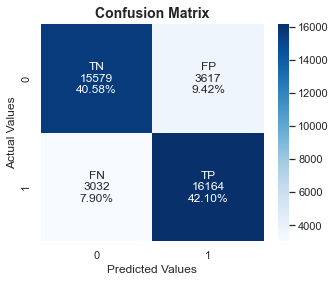

In [164]:
# plotting the confusion matrix: 

conf_matrix_plot(conf_matrix)

In [161]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy: ", round(accuracy_score(y_train_sm_pred_final["Churn"], y_train_sm_pred_final["churn_pred"]),3))
print("Recall: ", round(recall_score(y_train_sm_pred_final["Churn"], y_train_sm_pred_final["churn_pred"]),3))
print("Precision: ", round(precision_score(y_train_sm_pred_final["Churn"], y_train_sm_pred_final["churn_pred"]),3))
print("F1-Score: ", round(f1_score(y_train_sm_pred_final["Churn"], y_train_sm_pred_final["churn_pred"]),3))

Accuracy:  0.827
Recall:  0.842
Precision:  0.817
F1-Score:  0.829


### At 50% cutt-off, the model F1-Score, Accuracy, Specificity are >= 80%. However, precision is slightly lower at 78.9%.

### Plotting the ROC Curve:

In [165]:
# import the required libraries: 

from sklearn.metrics import auc, roc_auc_score, roc_curve

In [166]:
# defining the function to plot the ROC curve:

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve',size=14, fontweight = 600)
    plt.legend(loc="lower right")
    plt.show()

    return None

In [167]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final["Churn"], 
                                          y_train_sm_pred_final["churn_pred"], 
                                         drop_intermediate = False )

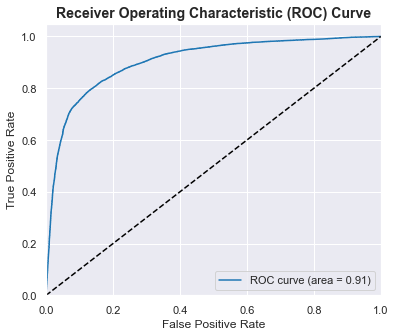

In [168]:
draw_roc(y_train_sm_pred_final["Churn"], y_train_sm_pred_final["Churn_prob"])

### We can see the area of the ROC curve is closer to 1, whic is the Gini of the model.

### Finding Optimal Cut-off Point:

In [169]:
# create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Churn_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

Churn  Churn_prob  churn_pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.397862           0    1    1    1    1    0    0    0    0    0    0
1      0    0.185099           0    1    1    0    0    0    0    0    0    0    0
2      0    0.217412           0    1    1    1    0    0    0    0    0    0    0
3      0    0.166947           0    1    1    0    0    0    0    0    0    0    0
4      0    0.063131           0    1    0    0    0    0    0    0    0    0    0

In [170]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Churn, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.685586     0.975568     0.395603
0.2          0.2  0.757528     0.951344     0.563711
0.3          0.3  0.799099     0.914826     0.683372
0.4          0.4  0.818269     0.878725     0.757814
0.5          0.5  0.826813     0.842050     0.811575
0.6          0.6  0.830459     0.801365     0.859554
0.7          0.7  0.825354     0.744113     0.906595
0.8          0.8  0.787846     0.625651     0.950042
0.9          0.9  0.629454     0.271463     0.987445


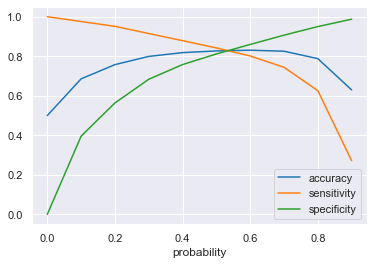

In [171]:
# plot accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [174]:
# create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Churn_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

Churn  Churn_prob  churn_pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59
0      0    0.397862           0    1    1    1    1    0    0    0    0    0    0     0     0     0     0     0     0     0     0     0
1      0    0.185099           0    1    1    0    0    0    0    0    0    0    0     0     0     0     0     0     0     0     0     0
2      0    0.217412           0    1    1    1    0    0    0    0    0    0    0     0     0     0     0     0     0     0     0     0
3      0    0.166947           0    1    1    0    0    0    0    0    0    0    0     0     0     0     0     0     0     0     0     0
4      0    0.063131           0    1    0    0    0    0    0    0    0    0    0     0     0     0     0     0     0     0     0     0

In [175]:
# calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Churn, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50         0.50  0.826813     0.842050     0.811575
0.51         0.51  0.827360     0.838560     0.816160
0.52         0.52  0.827803     0.835070     0.820536
0.53         0.53  0.828558     0.831006     0.826110
0.54         0.54  0.829939     0.827881     0.831996
0.55         0.55  0.830381     0.824130     0.836633
0.56         0.56  0.830590     0.819650     0.841529
0.57         0.57  0.830459     0.815534     0.845384
0.58         0.58  0.830173     0.810325     0.850021
0.59         0.59  0.830329     0.805532     0.855126


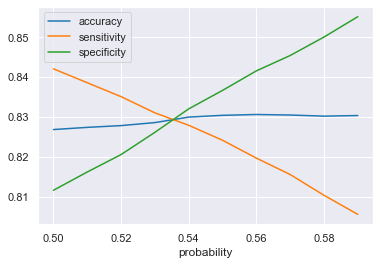

In [176]:
# plot accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

#### From the above graph we can conclude, the optimal probability cutoff point to predicted churn variable converges at 0.52

In [183]:
y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Churn_prob.map( lambda x: 1 if x > 0.59 else 0)

y_train_sm_pred_final.head()

Churn  Churn_prob  churn_pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59  final_churn_pred
0      0    0.397862           0    1    1    1    1    0    0    0    0    0    0     0     0     0     0     0     0     0     0     0                 0
1      0    0.185099           0    1    1    0    0    0    0    0    0    0    0     0     0     0     0     0     0     0     0     0                 0
2      0    0.217412           0    1    1    1    0    0    0    0    0    0    0     0     0     0     0     0     0     0     0     0                 0
3      0    0.166947           0    1    1    0    0    0    0    0    0    0    0     0     0     0     0     0     0     0     0     0                 0
4      0    0.063131           0    1    0    0    0    0    0    0    0    0    0     0     0     0     0     0     0     0     0     0                 0

In [184]:
print("Accuracy: ", round(accuracy_score(y_train_sm_pred_final["Churn"], y_train_sm_pred_final["final_churn_pred"]),3))
print("Recall: ", round(recall_score(y_train_sm_pred_final["Churn"], y_train_sm_pred_final["final_churn_pred"]),3))
print("Precision: ", round(precision_score(y_train_sm_pred_final["Churn"], y_train_sm_pred_final["final_churn_pred"]),3))
print("F1-Score: ", round(f1_score(y_train_sm_pred_final["Churn"], y_train_sm_pred_final["final_churn_pred"]),3))
print("AUC-Score: ", round(roc_auc_score(y_train_sm_pred_final["Churn"], y_train_sm_pred_final["final_churn_pred"]),3))

Accuracy:  0.83
Recall:  0.806
Precision:  0.848
F1-Score:  0.826
AUC-Score:  0.83


In [185]:
conf_matrix2 = metrics.confusion_matrix(y_train_sm_pred_final["Churn"], y_train_sm_pred_final["final_churn_pred"])

<function __main__.conf_matrix_plot(cm)>

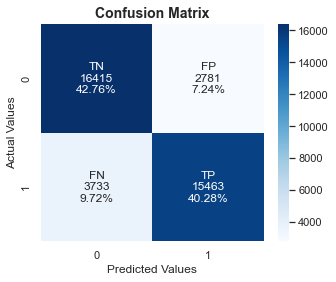

In [186]:
conf_matrix_plot(conf_matrix2)

#### When we select the optimal cutoff = 0.52, the various performance parameters Accuracy, Sensitivity & Specificity are all ~80%.

### Precision and recall tradeoff

In [188]:
# import the required libraries:

from sklearn.metrics import precision_recall_curve

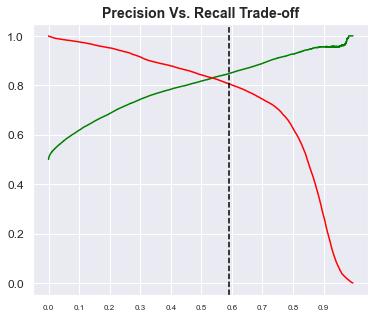

In [189]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final["Churn"], y_train_sm_pred_final["Churn_prob"])

# Plotting the Precision-Recall Trade off Curve
plt.figure(figsize=(6,5))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.59, color='black', linestyle='--') # additing axline
plt.title('Precision Vs. Recall Trade-off', size=14, fontweight = 600)
plt.xticks(np.arange(0,1,step=0.1),size=8)
plt.yticks(size=12)

plt.show()

### 1. There is relation between Precision and Recall.
### 2. Precision and Recall are inversely related means if one increases other will definetely decrease.
### 3. Based on Precision- Recall Trade off curve, the cutoff point seems to 0.52.

## Making predictions on the test set

In [190]:
# Scale the test data
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test.head()

arpu_6    arpu_7    arpu_8   onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
18395  0.000062  0.000171  0.000072  2.363222e-05     0.000038     0.000050      0.000050      0.000035      0.000036            0.0       0.000000            0.0            0.0       0.000000            0.0      0.000115      0.000109      0.000137  0.000000e+00      0.000002  3.512412e-07           0.0           0.0           0.0      0.001653      0.003261      0.000000     0.000000          0.0          0.0        0.000032        0.000030        0.000034      0.000055      0.000091      0.000114  7.584706e-07      0.000025      0.000000        0.000059        0.000068        0.000086      0.153497      1.063798           0.0      0.000392      0.000056      0.000006     0.007102          0.0     0.006200          0.003724          0.005620            0.0035          0.000060          0.000123          0.000068        0.000228        0.000534        0.000281           0.000000           0.008073           0.000000         0.000000         0.001534         0.000000   
16876  0.000154  0.000145  0.000108  1.372261e-04     0.000088     0.000158      0.000054      0.000067      0.000036            0.0       0.000024            0.0            0.0       0.000019            0.0      0.000284      0.000255      0.000298  3.727245e-07      0.000000  0.000000e+00           0.0           0.0           0.0      0.000301      0.001139      0.000353     0.009549          0.0          0.0        0.000077        0.000064        0.000075      0.000477      0.000327      0.000360  1.412651e-05      0.000000      0.000000        0.000345        0.000227        0.000255      0.000000      0.000000           0.0      0.000000      0.000001      0.000000     0.000000          0.0     0.000000          0.007448          0.008118            0.0035          0.000126          0.000132          0.000077        0.000319        0.000446        0.000625           0.009685           0.008073           0.000000         0.000889         0.000862         0.000000   
11117  0.000026  0.000047  0.000062  4.760662e-07     0.000004     0.000008      0.000022      0.000016      0.000027            0.0       0.000000            0.0            0.0       0.000000            0.0      0.000032      0.000020      0.000035  2.791198e-06      0.000006  9.984031e-06           0.0           0.0           0.0      0.000000      0.000015      0.000437     0.000000          0.0          0.0        0.000010        0.000009        0.000015      0.000008      0.000014      0.000018  5.024868e-06      0.000052      0.000043        0.000006        0.000016        0.000017      0.000000      0.000000           0.0      0.000000      0.000000      0.000000     0.000000          0.0     0.000000          0.001862          0.007494            0.0126          0.000016          0.000039          0.000051        0.000062        0.000086        0.000108           0.000000           0.064588           0.088833         0.000000         0.000140         0.000153   
13350  0.000128  0.000186  0.000119  5.706471e-05     0.000022     0.

In [191]:
# filter the X_test to reflect features from our final model:

X_test_final=X_test[col]
X_test_final.head()

arpu_6  onnet_mou_8  loc_og_mou_8  total_ic_mou_8  spl_ic_mou_8  total_rech_num_8  max_rech_amt_8  fb_user_8  3g_vbc_8  loc_ic_mou_diff  total_rech_num_diff  vol_2g_mb_diff
18395  0.000062     0.000050      0.000137        0.000086           0.0            0.0035        0.000281          0  0.000000         0.527546             0.568893        0.517066
16876  0.000154     0.000158      0.000298        0.000255           0.0            0.0035        0.000625          0  0.000000         0.527520             0.567912        0.517031
11117  0.000026     0.000008      0.000035        0.000017           0.0            0.0126        0.000108          1  0.000023         0.527538             0.571445        0.517067
13350  0.000128     0.000031      0.000283        0.000217           0.0            0.0028        0.000866          1  0.000016         0.527527             0.569188        0.517063
13749  0.000216     0.000023      0.000106        0.000180           0.0            0.0035        0.000312          0  0.000000         0.527537             0.568501        0.516956

In [192]:
# Add constant to the test model.

X_test_SM = sm.add_constant(X_test_final)
X_test_SM.columns

Index(['const', 'arpu_6', 'onnet_mou_8', 'loc_og_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'max_rech_amt_8', 'fb_user_8', '3g_vbc_8', 'loc_ic_mou_diff', 'total_rech_num_diff', 'vol_2g_mb_diff'], dtype='object')

### Predicting the target variable:

In [193]:
# Predicted values on the test set

y_test_pred = model.predict(X_test_SM)
y_test_pred.head()

18395    0.770941
16876    0.770949
11117    0.309377
13350    0.309474
13749    0.770944
dtype: float64

In [194]:
# Convert y_pred to a dataframe which is an array

y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

0
18395  0.770941
16876  0.770949
11117  0.309377
13350  0.309474
13749  0.770944

In [196]:
# Convert y_test to dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df.head()

churn
18395      0
16876      0
11117      0
13350      0
13749      0

In [197]:
# rename the column
y_pred = y_pred.rename(columns = {0:"churn_prob"})
y_pred.head()

churn_prob
18395    0.770941
16876    0.770949
11117    0.309377
13350    0.309474
13749    0.770944

In [198]:
# Append y_test_df and y_pred

y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

churn  churn_prob
18395      0    0.770941
16876      0    0.770949
11117      0    0.309377
13350      0    0.309474
13749      0    0.770944

In [199]:
#Create new column 'Final_Predicted' with value 1 if Churn_Prob > cutoff:

y_pred_final['test_churn_pred'] = y_pred_final.churn_prob.map(lambda x: 1 if x>0.53 else 0)
y_pred_final.head()

churn  churn_prob  test_churn_pred
18395      0    0.770941                1
16876      0    0.770949                1
11117      0    0.309377                0
13350      0    0.309474                0
13749      0    0.770944                1

In [200]:
# Check the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

print("Accuracy: ", round(accuracy_score(y_pred_final["churn"], y_pred_final["test_churn_pred"]),3))
print("Recall: ", round(recall_score(y_pred_final["churn"], y_pred_final["test_churn_pred"]),3))
print("Precision: ", round(precision_score(y_pred_final["churn"], y_pred_final["test_churn_pred"]),3))
print("F1-Score: ", round(f1_score(y_pred_final["churn"], y_pred_final["test_churn_pred"]),3))
print("AUC-Score: ", round(roc_auc_score(y_pred_final["churn"], y_pred_final["test_churn_pred"]),3))

Accuracy:  0.576
Recall:  0.858
Precision:  0.137
F1-Score:  0.237
AUC-Score:  0.706


### Plotting the ROC Curve:

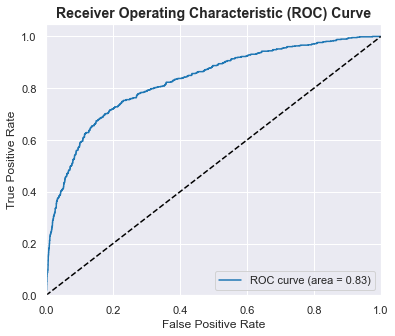

In [202]:
# ROC curve for the test dataset

# Define the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.churn_prob, drop_intermediate = False )
# Plot the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.churn_prob)

#### 1. The precision and F-1 score took a major hit in the test set.
#### 2. AUC is likely the most appropriate metric to use, since the Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.
### 3. Given the AUC remained consistent at ~0.88-0.89 in the train and test data set, the logistic regression model is performing well.

### Final conclusion with no PCA
#### We can see that the logistic model with no PCA has good sensitivity and accuracy, which are comparable to the models with PCA. So, we can go for the more simplistic model such as logistic regression with PCA as it expliains the important predictor variables as well as the significance of each variable. The model also hels us to identify the variables which should be act upon for making the decision of the to be churned customers. Hence, the model is more relevant in terms of explaining to the business.

### Analysis based on above model
#### 1. Incoming and outgoing calls reduces when customer is planning to switch
#### 2. Customer using roaming outgoing/incoming may churn
#### 3. Recharge Amounts/Numbers is strong indicator of churn. If the amount is reducing then it will indicate possible churn
#### 4. Revenue drops for the customer who is planning to switch

### With dimentionality reduction (using PCA)
#### 1. LogisticRegression is the best model
#### 2. If we want a more aggresive model then we can choose low threshold than 0.4
#### 3. Results of LogisticRegression

### With manual feature selection
#### 1. LogisiticRegression is the best model
#### 2. It performs as good as the model with PCA
### Important Features are
#### 1. Low Recharges
#### 2. High Roaming calls
#### 3. Low 2G/3G usage
#### 4. Low number of calls
#### 5. Low age on network